## Modelling from our previous data

We got to explore our datasets. 

Now we need to complete our data in order to get modellized dynamic flow data. 

In [328]:
import numpy as np
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt
import warnings
from scipy.optimize import curve_fit
from scipy import integrate
import natural_cubic_spline_stack_overflow as ncs
import dynamic_stock_model as dsm 
warnings.simplefilter(action='ignore', category=FutureWarning)

# Population of England, 1800-2022

,Population
1800,8620000.0
1801,8671000.0
1802,8731000.0
1803,8832000.0
1804,8945000.0
...,...
2018,55924528.0
2019,56230056.0
2020,56325961.0
2021,56554891.0


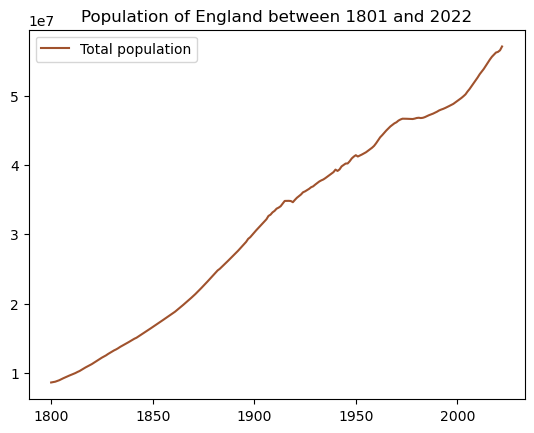

'\nax = sns.lineplot(y=pop_eng_1801_2022[\'Population\'],x=pop_eng_1801_2022.index,label="Total population",color=\'sienna\')\nax.set(xlabel=None, ylabel=None)\nax.ticklabel_format(style=\'sci\', axis=\'y\')\nax.set_title("Population of England between 1801 and 2022")\nfig = ax.get_figure()\nfig.savefig("Output/Pop-Eng-1801-2022.png",dpi=300,bbox_inches="tight")\n'

In [2]:
file = "Data/OWID/Population-of-england.csv"
pop_eng = pd.read_csv(file).drop(columns=['Entity','Code'])
pop_eng = pop_eng.set_index('Year')
pop_eng.columns = ['Population']
pop_eng.index.name = None
pop_eng_1801_2022 = pop_eng.loc[1800:2016,:]
#display(pop_eng_1801_2022)

file = "Model/Population-total-1971-2022-UK.csv"
pop_eng = pd.read_csv(file).set_index('Unnamed: 0')
pop_eng.index.name = None
for i in np.arange(2017,2023):
    pop_eng_1801_2022.loc[i,'Population'] = pop_eng.loc[i,'Population']
display(pop_eng_1801_2022)

def snsline(data,clm,clr,lbl,ttl,nm):
    ax = sns.lineplot(y=data[clm],x=data.index,label=lbl,color=clr)
    ax.set(xlabel=None, ylabel=None)
    ax.ticklabel_format(style='sci', axis='y')
    ax.set_title(ttl)
    fig = ax.get_figure()
    fig.savefig(nm,dpi=300,bbox_inches="tight")
    plt.show()

def snsline_cum(data,clm,clr,lbl,ttl,nm):
    ax = sns.lineplot(y=data[clm],x=data.index,label=lbl,color=clr)
    ax.set(xlabel=None, ylabel=None)
    ax.ticklabel_format(style='sci', axis='y')
    ax.set_title(ttl)
    fig = ax.get_figure()
    fig.savefig(nm,dpi=300,bbox_inches="tight")
    #plt.show()

snsline(pop_eng_1801_2022,'Population','sienna',"Total population","Population of England between 1801 and 2022","Output/Pop-Eng-1801-2022.png")

"""
ax = sns.lineplot(y=pop_eng_1801_2022['Population'],x=pop_eng_1801_2022.index,label="Total population",color='sienna')
ax.set(xlabel=None, ylabel=None)
ax.ticklabel_format(style='sci', axis='y')
ax.set_title("Population of England between 1801 and 2022")
fig = ax.get_figure()
fig.savefig("Output/Pop-Eng-1801-2022.png",dpi=300,bbox_inches="tight")
"""

Let's create our Dynamic Stock Model table of England's dwellings between 1800 and 2022. 

In [3]:
cols = ['Population','Stock','Stock per capita','Stock change','Inflow','Outflow']
DSM = pd.DataFrame(index=np.arange(1801,2023),columns=cols)

DSM['Population'] = pop_eng_1801_2022['Population']

display(DSM)

,Population,Stock,Stock per capita,Stock change,Inflow,Outflow
1801,8671000.0,NaN,NaN,NaN,NaN,NaN
1802,8731000.0,NaN,NaN,NaN,NaN,NaN
1803,8832000.0,NaN,NaN,NaN,NaN,NaN
1804,8945000.0,NaN,NaN,NaN,NaN,NaN
1805,9092000.0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
2018,55924528.0,NaN,NaN,NaN,NaN,NaN
2019,56230056.0,NaN,NaN,NaN,NaN,NaN
2020,56325961.0,NaN,NaN,NaN,NaN,NaN
2021,56554891.0,NaN,NaN,NaN,NaN,NaN


Let's integrate the Stock data we already processed earlier. 

In [4]:
file = "Model/Stock-1801-2022.csv"
stock_eng = pd.read_csv(file).set_index('Year')

# Every 10 years until 1969 
# 1971 and 1981 are doubled because of crosisng two original datasets 

# We observe that 1971 is two times represented 
stock_eng = stock_eng.drop(index=[1971])
stock_eng = stock_eng.drop(index=[1981])

display(stock_eng)

# The years are not all represented on the stock data
# Let's put in those that we have, and we'll interpolate 

for i in stock_eng.index:
    DSM.loc[i,'Stock'] = stock_eng.loc[i,'All Dwellings']
    DSM.loc[i,'Stock per capita'] = DSM.loc[i,'Stock']/DSM.loc[i,'Population']

display(DSM)
display(DSM['Stock per capita'].to_list())


,All Dwellings
Year,
1801,1.512000e+06
1811,1.714000e+06
1821,2.004000e+06
1831,2.420000e+06
1841,2.890000e+06
...,...
2018,2.421348e+07
2019,2.446124e+07
2020,2.470983e+07


,Population,Stock,Stock per capita,Stock change,Inflow,Outflow
1801,8671000.0,1512000.0,0.174374,NaN,NaN,NaN
1802,8731000.0,NaN,NaN,NaN,NaN,NaN
1803,8832000.0,NaN,NaN,NaN,NaN,NaN
1804,8945000.0,NaN,NaN,NaN,NaN,NaN
1805,9092000.0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
2018,55924528.0,24213476.671103,0.432967,NaN,NaN,NaN
2019,56230056.0,24461242.780735,0.435021,NaN,NaN,NaN
2020,56325961.0,24709833.890368,0.438694,NaN,NaN,NaN
2021,56554891.0,24927588.0,0.440768,NaN,NaN,NaN


[0.1743743512858955,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 0.1737631792376318,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 0.1749148991882692,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 0.18258638901463708,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 0.19347927964115955,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 0.18971462544589773,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 0.1939680348324749,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 0.1974176646706587,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 0.19947699599575058,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 0.19971432757105187,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 0.20517094855200366,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 0.2151079990505578,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 0.21120371945342178,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 0.235459286000802

Let's interpolate the missing data. 

In [5]:
def complete(data,col,Y1,Y2,n):
    S1 = data.loc[Y1,col]
    S2 = data.loc[Y2,col]
    r = (S2-S1)/(n+1)
    years = np.arange(Y1,Y2,1)
    replace = np.arange(S1,S2,r)
    replace = replace[1:]
    return replace 

def interpolate(data,col):
    Y1,Y2 = data.index[0],0 # 1801
    n = 0 
    i = data.index[0]
    while i < data.index[-1]:
        i += 1
        if pd.isna(data.loc[i,col]):
            n += 1 
        else:
            Y2 = i
            rep = complete(data,col,Y1,Y2,n)
            data.loc[Y1+1:Y2-1,'Stock per capita'] = complete(data,col,Y1,Y2,n)
            n = 0 
            Y1 = Y2
    return data 

DSM = interpolate(DSM,'Stock per capita')
display(DSM)

for i in DSM[pd.isna(DSM['Stock'])].index:
    DSM.loc[i,'Stock'] = DSM.loc[i,'Stock per capita']*DSM.loc[i,'Population']

for i in DSM.index[1:]:
    DSM.loc[i,'Stock change'] = DSM.loc[i,'Stock'] - DSM.loc[i-1,'Stock']

display(DSM)

DSM.to_csv('Model/DSM_V1.csv')

,Population,Stock,Stock per capita,Stock change,Inflow,Outflow
1801,8671000.0,1512000.0,0.174374,NaN,NaN,NaN
1802,8731000.0,NaN,0.174313,NaN,NaN,NaN
1803,8832000.0,NaN,0.174252,NaN,NaN,NaN
1804,8945000.0,NaN,0.174191,NaN,NaN,NaN
1805,9092000.0,NaN,0.17413,NaN,NaN,NaN
...,...,...,...,...,...,...
2018,55924528.0,24213476.671103,0.432967,NaN,NaN,NaN
2019,56230056.0,24461242.780735,0.435021,NaN,NaN,NaN
2020,56325961.0,24709833.890368,0.438694,NaN,NaN,NaN
2021,56554891.0,24927588.0,0.440768,NaN,NaN,NaN


,Population,Stock,Stock per capita,Stock change,Inflow,Outflow
1801,8671000.0,1512000.0,0.174374,NaN,NaN,NaN
1802,8731000.0,1521928.846762,0.174313,9928.846762,NaN,NaN
1803,8832000.0,1538994.696251,0.174252,17065.849489,NaN,NaN
1804,8945000.0,1558138.492061,0.174191,19143.79581,NaN,NaN
1805,9092000.0,1583188.891386,0.17413,25050.399325,NaN,NaN
...,...,...,...,...,...,...
2018,55924528.0,24213476.671103,0.432967,228170.109632,NaN,NaN
2019,56230056.0,24461242.780735,0.435021,247766.109632,NaN,NaN
2020,56325961.0,24709833.890368,0.438694,248591.109632,NaN,NaN
2021,56554891.0,24927588.0,0.440768,217754.109632,NaN,NaN


Let's plot the above data. 

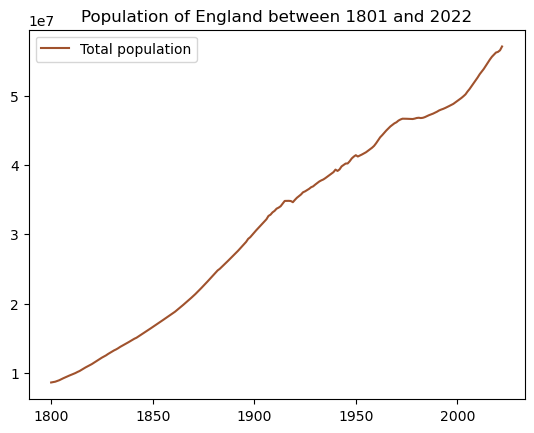

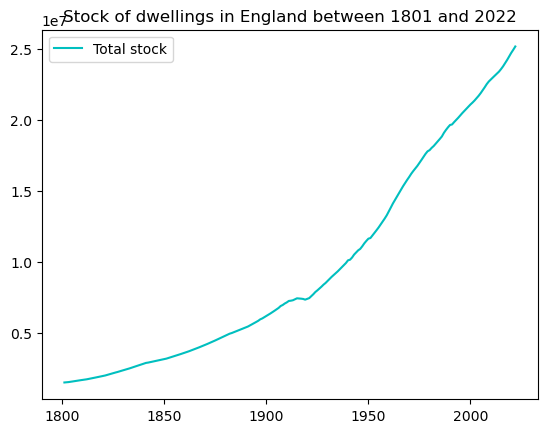

In [6]:
snsline(pop_eng_1801_2022,'Population','sienna',"Total population","Population of England between 1801 and 2022","Output/Pop-Eng-1801-2022.png")
snsline(DSM,'Stock','c',"Total stock","Stock of dwellings in England between 1801 and 2022","Output/Dwe-Eng-1801-2022.png")

# EPISCOPE

Let's integrate the EPISCOPE data. 

In [7]:
# figure S-1.1. from EPISCOBE GB: number of dwellings in 2013 

typ = ['SFH','MFH','TH','AB']
dat = ['pre 1919','1919-1944','1945-1964','1965-1980','1981-1990','1991- 2003','2004-2013']

EPISCOPE_TYP_freq = pd.DataFrame(index = typ, columns = dat)

#                                   SFH     MFH       TH      AB 
EPISCOPE_TYP_freq['pre 1919'] = [615*1000,982*1000,3259*1000,None]
EPISCOPE_TYP_freq['1919-1944'] = [567*1000,314*1000,2811*1000,None]
EPISCOPE_TYP_freq['1945-1964'] = [746*1000,595*1000,3026*1000,82*1000]
EPISCOPE_TYP_freq['1965-1980'] = [1206*1000,952*1000,2291*1000,188*1000]
EPISCOPE_TYP_freq['1981-1990'] = [767*1000,459*1000,695*1000,None]
EPISCOPE_TYP_freq['1991- 2003'] = [785*1000,391*1000,716*1000,None]
EPISCOPE_TYP_freq['2004-2013'] = [214*1000,296*1000,293*1000,49*1000]

display(EPISCOPE_TYP_freq)

EPISCOPE_TYP_spac = pd.DataFrame(index = typ, columns = dat)

# figure S-1.1. from EPISCOBE GB: living space in m2 in 2013 

#                                   SFH     MFH       TH      AB 
EPISCOPE_TYP_spac['pre 1919'] = [117528*1000,66539*1000,318723*1000,701*1000]
EPISCOPE_TYP_spac['1919-1944'] = [81900*1000,18963*1000,246106*1000,1131*1000]
EPISCOPE_TYP_spac['1945-1964'] = [95836*1000,33802*1000,248479*1000,4556*1000]
EPISCOPE_TYP_spac['1965-1980'] = [142846*1000,53172*1000,184076*1000,10789*1000]
EPISCOPE_TYP_spac['1981-1990'] = [91836*1000,22455*1000,47710*1000,723*1000]
EPISCOPE_TYP_spac['1991- 2003'] = [103807*1000,20698*1000,53674*1000,1252*1000]
EPISCOPE_TYP_spac['2004-2013'] = [30281*1000,16835*1000,26630*1000,2981*1000]

display(EPISCOPE_TYP_spac)


,pre 1919,1919-1944,1945-1964,1965-1980,1981-1990,1991- 2003,2004-2013
SFH,615000.0,567000.0,746000,1206000,767000.0,785000.0,214000
MFH,982000.0,314000.0,595000,952000,459000.0,391000.0,296000
TH,3259000.0,2811000.0,3026000,2291000,695000.0,716000.0,293000
AB,NaN,NaN,82000,188000,NaN,NaN,49000


,pre 1919,1919-1944,1945-1964,1965-1980,1981-1990,1991- 2003,2004-2013
SFH,117528000,81900000,95836000,142846000,91836000,103807000,30281000
MFH,66539000,18963000,33802000,53172000,22455000,20698000,16835000
TH,318723000,246106000,248479000,184076000,47710000,53674000,26630000
AB,701000,1131000,4556000,10789000,723000,1252000,2981000


Let's complete the `None` data. To do so we use the surface per dwelling type, we consider the evolution of the dwelling size in `AB` dwelling type, and we reaclulate the number of dwellings.  

,Dwelling size
1945,55.560976
1965,57.388298
2004,60.836735


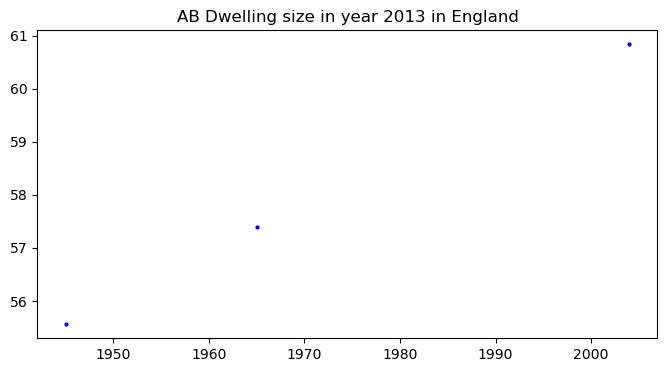

 the polynomial our fit created is: 
            2
-4.991e-05 x + 0.2865 x - 312.9.


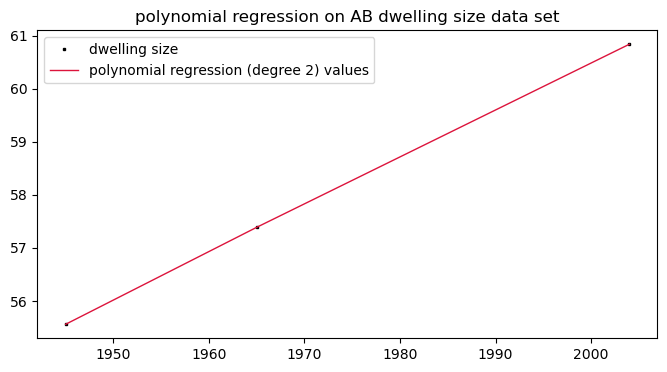

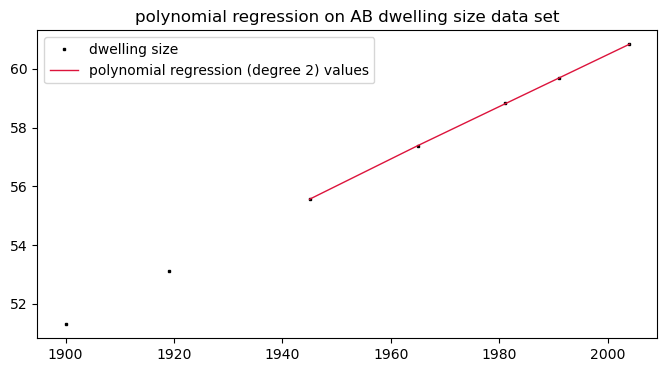

,pre 1919,1919-1944,1945-1964,1965-1980,1981-1990,1991- 2003,2004-2013
SFH,6.150000e+05,5.670000e+05,746000,1206000,767000.000000,785000.000000,214000
MFH,9.820000e+05,3.140000e+05,595000,952000,459000.000000,391000.000000,296000
TH,3.259000e+06,2.811000e+06,3026000,2291000,695000.000000,716000.000000,293000
AB,1.366378e+04,2.128911e+04,82000,188000,12291.443309,20970.075302,49000


In [8]:
s1 = EPISCOPE_TYP_spac.loc['AB','1945-1964']/EPISCOPE_TYP_freq.loc['AB','1945-1964']
s2 = EPISCOPE_TYP_spac.loc['AB','1965-1980']/EPISCOPE_TYP_freq.loc['AB','1965-1980']
s3 = EPISCOPE_TYP_spac.loc['AB','2004-2013']/EPISCOPE_TYP_freq.loc['AB','2004-2013']

dates = [1945,1965,2004]
AB_size = [s1,s2,s3]

AB_size_evolution = pd.DataFrame(index=dates,columns=["Dwelling size"])
AB_size_evolution["Dwelling size"] = AB_size

display(AB_size_evolution)

plt.figure(figsize=(8,4))
plt.plot(AB_size_evolution.index, AB_size_evolution["Dwelling size"], 'o', color = 'blue', markersize = 2, label = f'Dwelling size')
plt.title('AB Dwelling size in year 2013 in England')
plt.show()

degree = 2 # setting the degree
#find polynomial
polynomial = np.poly1d(np.polyfit(AB_size_evolution.index, AB_size_evolution["Dwelling size"], degree))
print(f' the polynomial our fit created is: \n{polynomial}.')
#apply to extended values
AB_size_evolution_reg = polynomial(AB_size_evolution.index)
plt.figure(figsize=(8,4))
plt.plot(AB_size_evolution.index, AB_size_evolution["Dwelling size"], 's', color = 'black', markersize = 2, label = f'dwelling size')
plt.plot(AB_size_evolution.index, AB_size_evolution_reg, color = 'crimson', lw = 1, label = f'polynomial regression (degree {degree}) values')
plt.title('polynomial regression on AB dwelling size data set')
plt.legend()
plt.show()

#display(AB_size_evolution_reg)
#display(polynomial)

# We can now approximate the size of the dwellings depending on there average year of construction

dates = [1900,1919,1945,1965,1981,1991,2004]
AB_size = [polynomial(1900),polynomial(1919),s1,s2,polynomial(1981),polynomial(1991),s3]
AB_size_evolution_approx = pd.DataFrame(index=dates,columns=["Dwelling size"])
AB_size_evolution_approx["Dwelling size"] = AB_size

plt.figure(figsize=(8,4))
plt.plot(AB_size_evolution_approx.index, AB_size_evolution_approx["Dwelling size"], 's', color = 'black', markersize = 2, label = f'dwelling size')
plt.plot(AB_size_evolution.index, AB_size_evolution_reg, color = 'crimson', lw = 1, label = f'polynomial regression (degree {degree}) values')
plt.title('polynomial regression on AB dwelling size data set')
plt.legend()
plt.show()

EPISCOPE_TYP_freq.loc['AB','pre 1919'] = EPISCOPE_TYP_spac.loc['AB','pre 1919']/AB_size_evolution_approx.loc[1900,'Dwelling size']
EPISCOPE_TYP_freq.loc['AB','1919-1944'] = EPISCOPE_TYP_spac.loc['AB','1919-1944']/AB_size_evolution_approx.loc[1919,'Dwelling size']
EPISCOPE_TYP_freq.loc['AB','1981-1990'] = EPISCOPE_TYP_spac.loc['AB','1981-1990']/AB_size_evolution_approx.loc[1981,'Dwelling size']
EPISCOPE_TYP_freq.loc['AB','1991- 2003'] = EPISCOPE_TYP_spac.loc['AB','1991- 2003']/AB_size_evolution_approx.loc[1991,'Dwelling size']

display(EPISCOPE_TYP_freq)

# Fitting the EPISCOPE data with our previous global data

In [9]:
print('The Episcope data gives us a total of dwellings in 2013 :')
display(EPISCOPE_TYP_freq.to_numpy().sum())
print('Our DSM table from national dwelling data gives us in 2013 :')
display(DSM.loc[2013,'Stock'])

The Episcope data gives us a total of dwellings in 2013 :


22367214.40482305

Our DSM table from national dwelling data gives us in 2013 :


23247462.122940928

We end up with a close enough data. We'll conserve the proportions of EPISCOPE and apply them to our DSM data for 2013. This will be our key points in time in order to adjust all further modellisation of lifetime by cohort.

22367214.404823046

23247462.122940928

SFH    21.907064
MFH    17.834139
TH     58.527628
AB      1.731170
dtype: float64

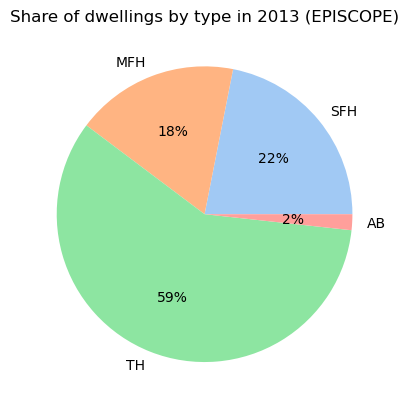

,pre 1919,1919-1944,1945-1964,1965-1980,1981-1990,1991- 2003,2004-2013
SFH,6.392029e+05,5.893139e+05,7.753584e+05,1.253461e+06,797184.804758,815893.183488,222421.836008
MFH,1.020646e+06,3.263573e+05,6.184159e+05,9.894654e+05,477063.657606,406387.560183,307648.894666
TH,3.387256e+06,2.921625e+06,3.145086e+06,2.381161e+06,722351.289840,744177.731691,304530.831544
AB,1.420151e+04,2.212692e+04,8.522706e+04,1.953986e+05,12775.165365,21795.339485,50928.364320


23247462.12294093

In [10]:
cohort_2013_by_TYP = EPISCOPE_TYP_freq.sum(axis=1)
s = cohort_2013_by_TYP.sum()
n = DSM.loc[2013,'Stock']
display(s)
display(n)
for i in cohort_2013_by_TYP.index:
    cohort_2013_by_TYP[i] = cohort_2013_by_TYP[i]/s*100

display(cohort_2013_by_TYP)

# Let's see how the 2013 data is shared: 

colors = sns.color_palette('pastel')[0:5]
plt.pie(cohort_2013_by_TYP, labels = cohort_2013_by_TYP.index, colors = colors, autopct='%.0f%%')
plt.title('Share of dwellings by type in 2013 (EPISCOPE)')
plt.savefig('Output/Share-by-type-2013.png',dpi=300,bbox_inches='tight')
plt.show()

for i in EPISCOPE_TYP_freq.index:
    for j in EPISCOPE_TYP_freq.columns:
        EPISCOPE_TYP_freq.loc[i,j] = EPISCOPE_TYP_freq.loc[i,j]/s*n 

display(EPISCOPE_TYP_freq) # The adjusted data 
display(EPISCOPE_TYP_freq.to_numpy().sum()) 

EPISCOPE_TYP_freq.to_csv('Model/2013-cohort-adjusted.csv')

# 2013 Data: year by year 

We begin to have a nice picture of 2013 cohorts. Now we want to approximate the exact age of each cohort in 2013. 

In [11]:
display(EPISCOPE_TYP_freq)

EPISCOPE_TYP_freq_by_year = pd.DataFrame(index = EPISCOPE_TYP_freq.index, columns=np.arange(1800,2014))
display(EPISCOPE_TYP_freq_by_year)

EPISCOPE_TYP_freq_ratio = pd.DataFrame(index = EPISCOPE_TYP_freq.index, columns=EPISCOPE_TYP_freq.columns)
for i in EPISCOPE_TYP_freq_ratio.index:
    for j in EPISCOPE_TYP_freq_ratio.columns:
        EPISCOPE_TYP_freq_ratio.loc[i,j] = 1
display(EPISCOPE_TYP_freq_ratio)

,pre 1919,1919-1944,1945-1964,1965-1980,1981-1990,1991- 2003,2004-2013
SFH,6.392029e+05,5.893139e+05,7.753584e+05,1.253461e+06,797184.804758,815893.183488,222421.836008
MFH,1.020646e+06,3.263573e+05,6.184159e+05,9.894654e+05,477063.657606,406387.560183,307648.894666
TH,3.387256e+06,2.921625e+06,3.145086e+06,2.381161e+06,722351.289840,744177.731691,304530.831544
AB,1.420151e+04,2.212692e+04,8.522706e+04,1.953986e+05,12775.165365,21795.339485,50928.364320


,1800,1801,1802,1803,1804,1805,1806,1807,1808,1809,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
SFH,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
MFH,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
TH,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AB,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


,pre 1919,1919-1944,1945-1964,1965-1980,1981-1990,1991- 2003,2004-2013
SFH,1,1,1,1,1,1,1
MFH,1,1,1,1,1,1,1
TH,1,1,1,1,1,1,1
AB,1,1,1,1,1,1,1


,SFH,MFH,TH,AB
1859,5416.974067,8649.542332,28705.558512,120.351784
1931,22665.920384,12552.202823,112370.197883,851.035562
1954,38767.918145,30920.792623,157254.316767,4261.352933
1972,78341.33593,61841.585245,148822.554409,12212.413893
1985,79718.480476,47706.365761,72235.128984,1277.516536
1996,62761.014114,31260.581553,57244.440899,1676.564576
2008,22242.183601,30764.889467,30453.083154,5092.836432


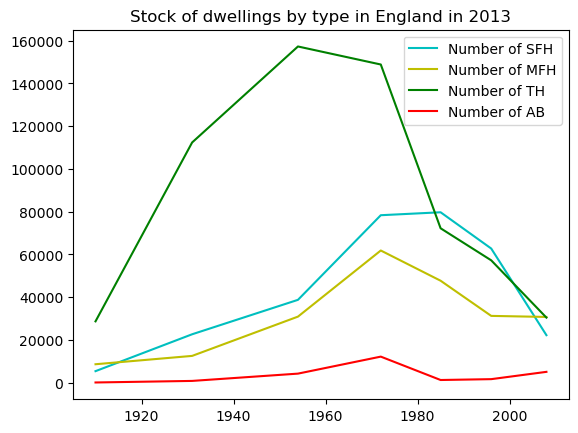

In [228]:
cohorts = [1918,1944,1964,1980,1990,2003,2013]

def mid_year_approx(cohorts,data,table):
    n = len(data.columns)
    t = len(data.index)
    D = []
    L = []
    D.append(int((cohorts[0]+1800)/2))
    L.append(cohorts[0]-1800)
    for i in np.arange(1,len(cohorts[1:])+1):
        D.append(int((cohorts[i]+cohorts[i-1])/2))
        L.append(cohorts[i]-cohorts[i-1])
    #print('D list : ',D)
    #print('L list : ',L)
    V = pd.DataFrame(index=data.index,columns=D)
    for j in np.arange(n):
        for i in np.arange(t):
            v = data.iloc[i,j]/L[j]
            table.loc[table.index[i],D[j]] = v
            V.loc[table.index[i],D[j]] = v
    return V

"""
def mid_year(cohorts,data,table,ratio):
    n = len(data.columns)
    t = len(data.index)
    D = []
    L = []
    D.append(int((cohorts[0]+1800)/2))
    L.append(cohorts[0]-1800)
    for i in np.arange(1,len(cohorts[1:])+1):
        D.append(int((cohorts[i]+cohorts[i-1])/2))
        L.append(cohorts[i]-cohorts[i-1])
    #print('D list : ',D)
    #print('L list : ',L)
    V = pd.DataFrame(index=data.index,columns=D)
    for j in np.arange(n):
        for i in np.arange(t):
            v = data.iloc[i,j]/L[j]
            table.loc[table.index[i],D[j]] = v
            V.loc[table.index[i],D[j]] = v
    display(V)
    for i in table.index:
        for d in np.arange(1800,cohorts[0]+1):
            mid = D[0]
            table.loc[i,d] = table.loc[i,mid]+ratio.loc[i,ratio.columns[j]]*(d-mid)
    for j in np.arange(1,n):
        for i in table.index:
            for d in np.arange(cohorts[j-1],cohorts[j]+1):
                mid = D[j]
                table.loc[i,d] = table.loc[i,mid]+ratio.loc[i,ratio.columns[j]]*(d-mid)
    #for i in np.arange(1800,cohorts[0]):
    return table
"""

approx_year = mid_year_approx(cohorts,EPISCOPE_TYP_freq,EPISCOPE_TYP_freq_by_year)

approx_year = approx_year.T
display(approx_year)
approx_year = approx_year.rename(index={1859:1910})

snsline_cum(approx_year,'SFH','c',"Number of SFH","Stock of dwellings by type in England in 2013","Output/Dwe-by-type-Eng-2013.png")
snsline_cum(approx_year,'MFH','y',"Number of MFH","Stock of dwellings by type in England in 2013","Output/Dwe-by-type-Eng-2013.png")
snsline_cum(approx_year,'TH','g',"Number of TH","Stock of dwellings by type in England in 2013","Output/Dwe-by-type-Eng-2013.png")
snsline_cum(approx_year,'AB','r',"Number of AB","Stock of dwellings by type in England in 2013","Output/Dwe-by-type-Eng-2013.png")

Let's do a regression for each type of dwelling, and reajust in order to re-match our reajusted Episcope-table. 

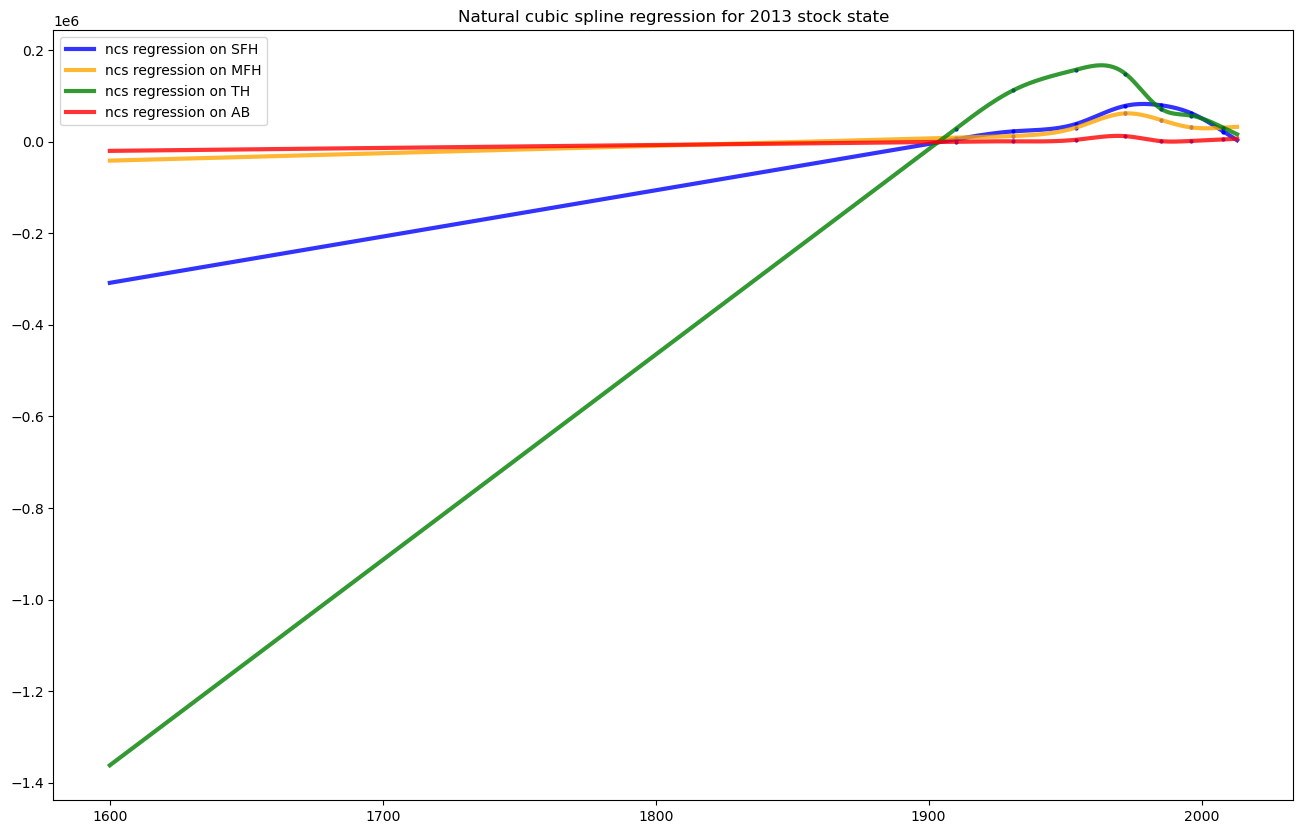

In [242]:
start = 1859 # TO ADJUST
start = 1600
end = 2013
time_range = np.array(np.arange(start,end+1))
#print(time_range)


# Polynomial works very badly here 
"""
degree = 4 # setting the degree

plt.figure(figsize=(8,5))
plt.plot(approx_year.index, approx_year["SFH"], 's', color = 'black', markersize = 2, label = f'dwelling number')
plt.title('Approximative number of SFH dwellings by type in 2013')
plt.legend()
plt.show()

#find polynomial
#display(approx_year.index.to_list())
#display(approx_year["SFH"].to_list())
polynomial_SFH = np.poly1d(np.polyfit(approx_year.index, approx_year["SFH"].to_list(), degree))
#polynomial_MFH = np.poly1d(np.polyfit(approx_year.index, approx_year["MFH"], degree))
#polynomial_TH = np.poly1d(np.polyfit(approx_year.index, approx_year["TH"], degree))
#polynomial_AB = np.poly1d(np.polyfit(approx_year.index, approx_year["AB"], degree))
print(f' the polynomial our fit created is: \n{polynomial_SFH}.')
#print(f' the polynomial our fit created is: \n{polynomial_MFH}.')
#print(f' the polynomial our fit created is: \n{polynomial_TH}.')
#print(f' the polynomial our fit created is: \n{polynomial_AB}.')
#apply to extended values

#approx_year_reg = polynomial_SFH(np.arange(start,end+1))
approx_year_reg = pd.DataFrame(index = np.arange(1859,2008+1),columns=["SFH"])
approx_year_reg["SFH"] = [polynomial_SFH(x) for x in approx_year_reg.index]

plt.figure(figsize=(8,5))
plt.plot(approx_year.index, approx_year["SFH"], 's', color = 'black', markersize = 2, label = f'dwelling number')
plt.plot(approx_year_reg.index, approx_year_reg["SFH"], color = 'crimson', lw = 1, label = f'polynomial regression (degree {degree}) values')
plt.title('polynomial regression on number of dwellings by type in 2013')
plt.legend()
"""

#display(time_range)
approx_SFH = np.array(approx_year["SFH"].to_list())
#display(approx_SFH)

ncs_SFH = ncs.get_natural_cubic_spline_model(np.array(approx_year.index), approx_SFH, minval=min(time_range), 
                                               maxval=max(time_range), knots = approx_year.index.to_list())

SFH_ncs = ncs_SFH.predict(time_range)

plt.figure(figsize=(16,10))

plt.plot(approx_year.index, approx_year["SFH"], 'o', color = 'blue', markersize = 2)#, label = f'Number of SFH')
plt.plot(time_range, SFH_ncs, color = 'blue', lw = 3, alpha = 0.8, label = 'ncs regression on SFH')

approx_MFH = np.array(approx_year["MFH"].to_list())
ncs_MFH = ncs.get_natural_cubic_spline_model(np.array(approx_year.index), approx_MFH, minval=min(time_range), 
                                             maxval=max(time_range), knots = approx_year.index.to_list())
MFH_ncs = ncs_MFH.predict(time_range)

plt.plot(approx_year.index, approx_year["MFH"], 'o', color = 'blue', markersize = 2)#, label = f'Number of MFH')
plt.plot(time_range, MFH_ncs, color = 'orange', lw = 3, alpha = 0.8, label = 'ncs regression on MFH')

approx_TH = np.array(approx_year["TH"].to_list())
ncs_TH = ncs.get_natural_cubic_spline_model(np.array(approx_year.index), approx_TH, minval=min(time_range), 
                                             maxval=max(time_range), knots = approx_year.index.to_list())
TH_ncs = ncs_TH.predict(time_range)

plt.plot(approx_year.index, approx_year["TH"], 'o', color = 'blue', markersize = 2)#, label = f'Number of TH')
plt.plot(time_range, TH_ncs, color = 'green', lw = 3, alpha = 0.8, label = 'ncs regression on TH')

approx_AB = np.array(approx_year["AB"].to_list())
ncs_AB = ncs.get_natural_cubic_spline_model(np.array(approx_year.index), approx_AB, minval=min(time_range), 
                                             maxval=max(time_range), knots = approx_year.index.to_list())
AB_ncs = ncs_AB.predict(time_range)

plt.plot(approx_year.index, approx_year["AB"], 'o', color = 'blue', markersize = 2)#, label = f'Number of AB')
plt.plot(time_range, AB_ncs, color = 'red', lw = 3, alpha = 0.8, label = 'ncs regression on AB')

#display(ncs_AB)
#display(AB_ncs)

plt.legend()
plt.title('Natural cubic spline regression for 2013 stock state')
plt.savefig('Output/Dwe-stock-2013-by-type.png',dpi=300,bbox_inches='tight')
plt.show()

# Cohorts 

Let's create our cohort tables for each type of dwelling. 

In [243]:
start = 1600 # TO ADJUST
projection = 2050 
time_frame = np.array(np.arange(start,projection+1))

cohort_SFH = pd.DataFrame(index=time_frame,columns=time_frame)
cohort_MFH = pd.DataFrame(index=time_frame,columns=time_frame)
cohort_TH = pd.DataFrame(index=time_frame,columns=time_frame)
cohort_AB = pd.DataFrame(index=time_frame,columns=time_frame)

keys = ['AB','MFH','SFH','TH']

all_cohorts = {
    'AB':cohort_AB,
    'MFH':cohort_MFH,
    'SFH':cohort_SFH,
    'TH':cohort_TH,
}

display(type(all_cohorts))

dict

In [244]:
start = 1600 # TO ADJUST
projection = 2050 
time_frame = np.array(np.arange(start,projection+1))

cohort_SUM = pd.DataFrame(index=time_frame,columns=time_frame)

for j in cohort_SUM.columns:
    for i in cohort_SUM.index:
        cohort_SUM.loc[i,j] = 0

In [245]:
def display_cohorts(keys=keys,all_cohorts=all_cohorts):
    for t in keys:
        display(all_cohorts[t])
    return 

def display_cohorts_columns(start,end,keys=keys,all_cohorts=all_cohorts):
    for t in keys:
        display(all_cohorts[t].loc[:,start:end])
    return 

def display_cohorts_index(start,end,keys=keys,all_cohorts=all_cohorts):
    for t in keys:
        display(all_cohorts[t].loc[start:end,:])
    return 

def display_cohorts_index_columns(start_i,end_i,start_c,end_c,keys=keys,all_cohorts=all_cohorts):
    for t in keys:
        display(all_cohorts[t].loc[start_i:end_i,start_c:end_c])
    return 

def save_to_csv(folder,suffix,keys=keys,all_cohorts=all_cohorts):
    for t in keys:
        all_cohorts[t].to_csv(folder+"/cohort_"+t+"_"+suffix+".csv")
    return 

def sum_all_cohorts(cohort_SUM=cohort_SUM,keys=keys,all_cohorts=all_cohorts):
    for i in cohort_SUM.index:
        for j in cohort_SUM.columns:
            cohort_SUM.loc[i,j] = 0
            for t in keys:
                if all_cohorts[t].loc[i,j] >= 0:
                    cohort_SUM.loc[i,j] += all_cohorts[t].loc[i,j]
    return cohort_SUM

def save_sum_to_csv(folder,suffix,cohort_SUM=cohort_SUM):
    cohort_SUM.to_csv(folder+"/cohort_SUM_"+suffix+".csv")
    return 

In [246]:
def fill_cohort_with_zeros(keys=keys,all_cohorts=all_cohorts):
    for t in keys:
        cohort = all_cohorts[t]
        m = max(cohort.index)
        print(m)
        for j in cohort.columns:
            for i in np.arange(j+1,m+1):
                cohort.loc[i,j] = 0
        all_cohorts[t] = cohort
    return all_cohorts 

all_cohorts = fill_cohort_with_zeros()

display(type(all_cohorts))
display_cohorts(all_cohorts)



2050
2050
2050
2050


dict

,1600,1601,1602,1603,1604,1605,1606,1607,1608,1609,...,2041,2042,2043,2044,2045,2046,2047,2048,2049,2050
1600,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1601,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1602,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1603,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1604,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2046,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN
2047,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,NaN,NaN,NaN,NaN
2048,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2049,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,NaN,NaN


,1600,1601,1602,1603,1604,1605,1606,1607,1608,1609,...,2041,2042,2043,2044,2045,2046,2047,2048,2049,2050
1600,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1601,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1602,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1603,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1604,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2046,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN
2047,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,NaN,NaN,NaN,NaN
2048,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2049,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,NaN,NaN


,1600,1601,1602,1603,1604,1605,1606,1607,1608,1609,...,2041,2042,2043,2044,2045,2046,2047,2048,2049,2050
1600,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1601,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1602,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1603,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1604,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2046,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN
2047,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,NaN,NaN,NaN,NaN
2048,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2049,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,NaN,NaN


,1600,1601,1602,1603,1604,1605,1606,1607,1608,1609,...,2041,2042,2043,2044,2045,2046,2047,2048,2049,2050
1600,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1601,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1602,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1603,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1604,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2046,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN
2047,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,NaN,NaN,NaN,NaN
2048,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2049,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,NaN,NaN


Let's fill in the 2013 data for each type of dwelling, that we just modelled.

In [247]:
start = 1600 # TO ADJUST
end = 2013
time_range = np.array(np.arange(start,end+1))

all_ncs = {
    'AB':AB_ncs,
    'MFH':MFH_ncs,
    'SFH':SFH_ncs,
    'TH':TH_ncs,
}

def fill_cohort_column(year,keys=keys,all_ncs=all_ncs,all_cohorts=all_cohorts):
    start = 1600
    for t in keys:
        ences = all_ncs[t]
        #display(ences)
        cohort = all_cohorts[t]
        for i in np.arange(start,year+1):
        #for i in np.array(np.arange(start,year+1)):
            n = ences[i-start]
            # The ncs go into negative number before a certain date => we adjust at zeros those numbers 
            cohort.loc[i,year] = max(ences[i-start],0)
        all_cohorts[t] = cohort 
    return all_cohorts  

all_cohorts = fill_cohort_column(2013)

display(type(all_cohorts))
display_cohorts_index_columns(2010,2015,2010,2015)

dict

,2010,2011,2012,2013,2014,2015
2010,NaN,NaN,NaN,5640.245847,NaN,NaN
2011,0,NaN,NaN,5913.950555,NaN,NaN
2012,0,0,NaN,6187.655263,NaN,NaN
2013,0,0,0,6461.35997,NaN,NaN
2014,0,0,0,0,NaN,NaN
2015,0,0,0,0,0,NaN


,2010,2011,2012,2013,2014,2015
2010,NaN,NaN,NaN,31452.022104,NaN,NaN
2011,0,NaN,NaN,31795.588422,NaN,NaN
2012,0,0,NaN,32139.15474,NaN,NaN
2013,0,0,0,32482.721059,NaN,NaN
2014,0,0,0,0,NaN,NaN
2015,0,0,0,0,0,NaN


,2010,2011,2012,2013,2014,2015
2010,NaN,NaN,NaN,14620.360682,NaN,NaN
2011,0,NaN,NaN,10809.449223,NaN,NaN
2012,0,0,NaN,6998.537764,NaN,NaN
2013,0,0,0,3187.626305,NaN,NaN
2014,0,0,0,0,NaN,NaN
2015,0,0,0,0,0,NaN


,2010,2011,2012,2013,2014,2015
2010,NaN,NaN,NaN,24742.064226,NaN,NaN
2011,0,NaN,NaN,21886.554761,NaN,NaN
2012,0,0,NaN,19031.045297,NaN,NaN
2013,0,0,0,16175.535832,NaN,NaN
2014,0,0,0,0,NaN,NaN
2015,0,0,0,0,0,NaN


Let's adjust our total 2013 stock of cohorts, taking the type shares into account, to our data. 

18835882.742614083
23247462.122940928
23247462.12294093


,pre 1919,1919-1944,1945-1964,1965-1980,1981-1990,1991- 2003,2004-2013
SFH,6.392029e+05,5.893139e+05,7.753584e+05,1.253461e+06,797184.804758,815893.183488,222421.836008
MFH,1.020646e+06,3.263573e+05,6.184159e+05,9.894654e+05,477063.657606,406387.560183,307648.894666
TH,3.387256e+06,2.921625e+06,3.145086e+06,2.381161e+06,722351.289840,744177.731691,304530.831544
AB,1.420151e+04,2.212692e+04,8.522706e+04,1.953986e+05,12775.165365,21795.339485,50928.364320


5092836.431963005

sommation of all adjusted cohorts :  23247462.122940928
the total stock from our data :  23247462.122940928


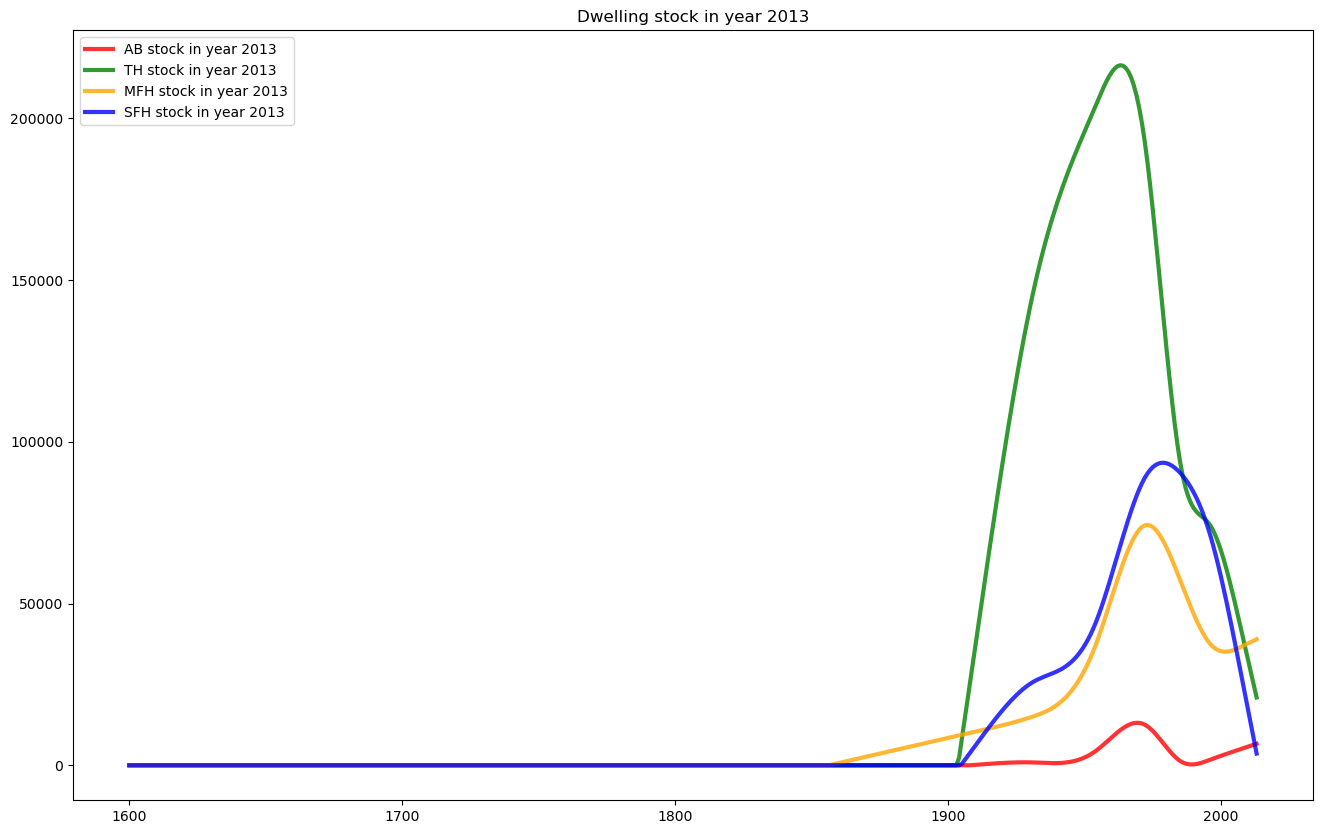

In [248]:
print(cohort_AB[2013].sum()+cohort_TH[2013].sum()+cohort_MFH[2013].sum()+cohort_SFH[2013].sum())
print(DSM.loc[2013,'Stock'])

# Again, we will adjust the 2013 column to our Stock 

print(EPISCOPE_TYP_freq.values.sum())
display(EPISCOPE_TYP_freq)

EPISCOPE_TYP = EPISCOPE_TYP_freq.sum(axis=1)
display(EPISCOPE_TYP['SFH'])

def adjust_cohort_column_to_total_stock(cohort,year,sum_type):
    total_cohort = cohort[year].sum()
    for i in cohort.index:
        cohort.loc[i,year] = cohort.loc[i,year]/total_cohort*sum_type
    return cohort 

for t in keys:
    cohort = adjust_cohort_column_to_total_stock(all_cohorts[t],2013,EPISCOPE_TYP[t])
    all_cohorts[t] = cohort 

"""
cohort_AB = adjust_cohort_column_to_total_stock(cohort_AB,2013,EPISCOPE_TYP['AB'])
#display(cohort_AB)
cohort_TH = adjust_cohort_column_to_total_stock(cohort_TH,2013,EPISCOPE_TYP['TH'])
#display(cohort_TH)
cohort_MFH = adjust_cohort_column_to_total_stock(cohort_MFH,2013,EPISCOPE_TYP['MFH'])
display(cohort_MFH)
cohort_SFH = adjust_cohort_column_to_total_stock(cohort_SFH,2013,EPISCOPE_TYP['SFH'])
#display(cohort_SFH)
"""

sommation = 0 
for t in keys:
    sommation += all_cohorts[t][2013].sum()
print('sommation of all adjusted cohorts : ',sommation)
print('the total stock from our data : ',DSM.loc[2013,'Stock'])


plt.figure(figsize=(16,10))
plt.plot(np.arange(1600,2014), cohort_AB.loc[1600:2013,2013], color = 'red', lw = 3, alpha = 0.8, label = 'AB stock in year 2013')
plt.plot(np.arange(1600,2014), cohort_TH.loc[1600:2013,2013], color = 'green', lw = 3, alpha = 0.8, label = 'TH stock in year 2013')
plt.plot(np.arange(1600,2014), cohort_MFH.loc[1600:2013,2013], color = 'orange', lw = 3, alpha = 0.8, label = 'MFH stock in year 2013')
plt.plot(np.arange(1600,2014), cohort_SFH.loc[1600:2013,2013], color = 'blue', lw = 3, alpha = 0.8, label = 'SFH stock in year 2013')
plt.legend()
plt.title('Dwelling stock in year 2013')
plt.savefig('Output/Dwe-stock-2013-by-type-adjusted.png',dpi=300,bbox_inches='tight')
plt.show()


# Lifetime and filling cohorts before 2013

Now we have our 2013 year fixed in our cohorts. We want to find a lifetime, proper to each type of dwelling, that fits the cohort while matching our total stock of dwellings. 

In [249]:
keys = ['AB','MFH','SFH','TH']

# TBD ? REPLACE WITH scipy.stats.skewnorm

# let's try tp find an approximation of the lifetimes, by cohorts 

sigma = {
    'AB':20,
    'MFH':20,
    'SFH':20,
    'TH':20,
}

tau = {
    'AB':50,
    'MFH':50,
    'SFH':50,
    'TH':50,
}

def lifetime(year,c,TYP,sigma=sigma,tau=tau):
    # signma [years]:   the standard deviation
    # tau [years]:      the mean lifetime
    if year < c:
        LT = 0 
        return LT 
    # TBD VERIFIER POUR LE CAS year = c CE QU'IL SE PASSE SI ON A BIEN 0 ou PAS ALORS QUOI ?????? 
    # TBD CALCULER L'INTEGRALE VOIR SI ON EST ASSEZ PROCHE DE 1 
    else:
        S = sigma[TYP] 
        T = tau[TYP]
        LT = (1/(S*(2*np.pi)**(1/2)))*np.exp(-(year-c-T)**2/(2*S**2))
        return LT

# TBD BETTER TO INTEGRATE THEREAFTER ???? 

def remaining(year,c,TYP,lifetime=lifetime,sigma=sigma,tau=tau):
    if year < c: 
        REM = 0 
        return REM 
    else:
        REM = 1 
        for i in np.arange(c,year+1):
            REM -= lifetime(i,c,TYP)
        return REM


for i in keys:
    #print(sigma[i])
    print(lifetime(1995,1996,i))
    print(remaining(1995,1996,i))
    print(lifetime(1996,1996,i))
    print(remaining(1996,1996,i))
    print(lifetime(1998,1996,i))
    print(remaining(1998,1996,i))
    print(lifetime(2013,1996,i))
    print(remaining(2013,1996,i))
    print(lifetime(2050,1996,i))
    print(remaining(2050,1996,i))
    print(lifetime(2100,1996,i))
    print(remaining(2100,1996,i))

"""
def lifetime_TH(year,c):
    sigma = 20 # years, the standard deviation
    tau = 50 # years, the mean lifetime
    lifetime = (1/(sigma*(2*np.pi)**(1/2)))*np.exp(-(year-c-tau)**2/(2*sigma**2))
    return lifetime

def lifetime_TH_fixed_year(c):
    fixed_year = 2013
    return lifetime_TH(fixed_year,c)

def lifetime_TH_fixed_cohort(year):
    fixed_cohort = 1996
    return lifetime_TH(year,fixed_cohort)

def lifetime_TH_adjusted(year,c):
    if year < c:
        return 0
    else:
        return lifetime_TH(year,c)/lifetime_TH_fixed_cohort(year)

def lifetime_TH_adjusted_fixed_cohort(year):
    fixed_cohort = 1996
    return lifetime_TH_adjusted(year,fixed_cohort) 

print(lifetime_TH(2013,1996))

LT_TH = [lifetime_TH(2013,x) for x in np.arange(1600,2014)]
plt.figure(figsize=(16,10))
plt.plot(np.arange(1600,2014), LT_TH, color = 'y', lw = 3, alpha = 0.8, label = 'lifetime, year 2013')
plt.legend()
plt.title('In 2013, remaining cohorts:')
plt.savefig('Output/2013-year-lifetime.png',dpi=300,bbox_inches='tight')
plt.show()

LT_TH = [lifetime_TH(x,1996) for x in np.arange(1600,2151)]
plt.figure(figsize=(16,10))
plt.plot(np.arange(1600,2151), LT_TH, color = 'y', lw = 3, alpha = 0.8, label = 'lifetime, cohort 1996')
plt.vlines(x=1996,ymin=0,ymax=0.010)
plt.legend()
plt.title('The 1996 dwellings, cohort lifetime:')
plt.savefig('Output/1996-cohort-lifetime.png',dpi=300,bbox_inches='tight')
plt.show()

display(cohort_TH.loc[1996,2013])

remainings_TH = integrate.quad(lifetime_TH_adjusted_fixed_cohort,1996,2500)
print('integrating : ',remainings_TH)

# PLUS SIMPLE= INTEGRER ????
""" 

"""
def propager_lifetime_on_index(cohort,ref_year,lifetime):
    start = cohort.columns[0]
    end = cohort.columns[-1]
    for c in cohort.index:
        built = 
        for j in cohort.columns[:ref_year-start]:
            #
        for j in cohort.columns[ref_year+1:end-start+1]:
            #
    return cohort


# We want to go the other way around: find the lifetime model depending in the 2013 data. 
        
cohort_TH = propager_lifetime_on_index(cohort_TH,2013)
"""
display(type(all_cohorts))
display_cohorts_index_columns(1600,1605,2010,2015)
display_cohorts_index_columns(2010,2015,2010,2015)
display_cohorts_index_columns(2010,2015,2045,2050)

0
0
0.0008764150246784271
0.9991235849753216
0.001119726514742145
0.9970119907409897
0.005113246228198901
0.9537173407785473
0.019552134698772795
0.41676110456736515
0.0005210467407211298
0.008992897060808582
0
0
0.0008764150246784271
0.9991235849753216
0.001119726514742145
0.9970119907409897
0.005113246228198901
0.9537173407785473
0.019552134698772795
0.41676110456736515
0.0005210467407211298
0.008992897060808582
0
0
0.0008764150246784271
0.9991235849753216
0.001119726514742145
0.9970119907409897
0.005113246228198901
0.9537173407785473
0.019552134698772795
0.41676110456736515
0.0005210467407211298
0.008992897060808582
0
0
0.0008764150246784271
0.9991235849753216
0.001119726514742145
0.9970119907409897
0.005113246228198901
0.9537173407785473
0.019552134698772795
0.41676110456736515
0.0005210467407211298
0.008992897060808582


dict

,2010,2011,2012,2013,2014,2015
1600,NaN,NaN,NaN,0.0,NaN,NaN
1601,NaN,NaN,NaN,0.0,NaN,NaN
1602,NaN,NaN,NaN,0.0,NaN,NaN
1603,NaN,NaN,NaN,0.0,NaN,NaN
1604,NaN,NaN,NaN,0.0,NaN,NaN
1605,NaN,NaN,NaN,0.0,NaN,NaN


,2010,2011,2012,2013,2014,2015
1600,NaN,NaN,NaN,0.0,NaN,NaN
1601,NaN,NaN,NaN,0.0,NaN,NaN
1602,NaN,NaN,NaN,0.0,NaN,NaN
1603,NaN,NaN,NaN,0.0,NaN,NaN
1604,NaN,NaN,NaN,0.0,NaN,NaN
1605,NaN,NaN,NaN,0.0,NaN,NaN


,2010,2011,2012,2013,2014,2015
1600,NaN,NaN,NaN,0.0,NaN,NaN
1601,NaN,NaN,NaN,0.0,NaN,NaN
1602,NaN,NaN,NaN,0.0,NaN,NaN
1603,NaN,NaN,NaN,0.0,NaN,NaN
1604,NaN,NaN,NaN,0.0,NaN,NaN
1605,NaN,NaN,NaN,0.0,NaN,NaN


,2010,2011,2012,2013,2014,2015
1600,NaN,NaN,NaN,0.0,NaN,NaN
1601,NaN,NaN,NaN,0.0,NaN,NaN
1602,NaN,NaN,NaN,0.0,NaN,NaN
1603,NaN,NaN,NaN,0.0,NaN,NaN
1604,NaN,NaN,NaN,0.0,NaN,NaN
1605,NaN,NaN,NaN,0.0,NaN,NaN


,2010,2011,2012,2013,2014,2015
2010,NaN,NaN,NaN,5805.08786,NaN,NaN
2011,0,NaN,NaN,6086.79187,NaN,NaN
2012,0,0,NaN,6368.495881,NaN,NaN
2013,0,0,0,6650.199892,NaN,NaN
2014,0,0,0,0.0,NaN,NaN
2015,0,0,0,0.0,0,NaN


,2010,2011,2012,2013,2014,2015
2010,NaN,NaN,NaN,37722.920249,NaN,NaN
2011,0,NaN,NaN,38134.986754,NaN,NaN
2012,0,0,NaN,38547.053259,NaN,NaN
2013,0,0,0,38959.119765,NaN,NaN
2014,0,0,0,0.0,NaN,NaN
2015,0,0,0,0.0,0,NaN


,2010,2011,2012,2013,2014,2015
2010,NaN,NaN,NaN,16576.841816,NaN,NaN
2011,0,NaN,NaN,12255.958234,NaN,NaN
2012,0,0,NaN,7935.074652,NaN,NaN
2013,0,0,0,3614.19107,NaN,NaN
2014,0,0,0,0.0,NaN,NaN
2015,0,0,0,0.0,0,NaN


,2010,2011,2012,2013,2014,2015
2010,NaN,NaN,NaN,32072.657266,NaN,NaN
2011,0,NaN,NaN,28371.115813,NaN,NaN
2012,0,0,NaN,24669.574359,NaN,NaN
2013,0,0,0,20968.032906,NaN,NaN
2014,0,0,0,0.0,NaN,NaN
2015,0,0,0,0.0,0,NaN


,2045,2046,2047,2048,2049,2050
2010,NaN,NaN,NaN,NaN,NaN,NaN
2011,NaN,NaN,NaN,NaN,NaN,NaN
2012,NaN,NaN,NaN,NaN,NaN,NaN
2013,NaN,NaN,NaN,NaN,NaN,NaN
2014,NaN,NaN,NaN,NaN,NaN,NaN
2015,NaN,NaN,NaN,NaN,NaN,NaN


,2045,2046,2047,2048,2049,2050
2010,NaN,NaN,NaN,NaN,NaN,NaN
2011,NaN,NaN,NaN,NaN,NaN,NaN
2012,NaN,NaN,NaN,NaN,NaN,NaN
2013,NaN,NaN,NaN,NaN,NaN,NaN
2014,NaN,NaN,NaN,NaN,NaN,NaN
2015,NaN,NaN,NaN,NaN,NaN,NaN


,2045,2046,2047,2048,2049,2050
2010,NaN,NaN,NaN,NaN,NaN,NaN
2011,NaN,NaN,NaN,NaN,NaN,NaN
2012,NaN,NaN,NaN,NaN,NaN,NaN
2013,NaN,NaN,NaN,NaN,NaN,NaN
2014,NaN,NaN,NaN,NaN,NaN,NaN
2015,NaN,NaN,NaN,NaN,NaN,NaN


,2045,2046,2047,2048,2049,2050
2010,NaN,NaN,NaN,NaN,NaN,NaN
2011,NaN,NaN,NaN,NaN,NaN,NaN
2012,NaN,NaN,NaN,NaN,NaN,NaN
2013,NaN,NaN,NaN,NaN,NaN,NaN
2014,NaN,NaN,NaN,NaN,NaN,NaN
2015,NaN,NaN,NaN,NaN,NaN,NaN


We have defined our `lifetime` (the dying-out curve) and `survival` (going from 1 to 0) model, and we can also get the inverse in order to get new constructions for each cohort. 

Now, let's fill in all the cohort tables, with the cohorts before 2013. 

In [250]:
start = 1600
end = 2050

def fill_c_new_construction(year,start=start,keys=keys,sigma=sigma,lifetime=lifetime,tau=tau,all_cohorts=all_cohorts):
    # year:     the year we have data on current remaining buildings 
    # c:        the cohort's year 
    # cohort:   the table 
    display(type(all_cohorts))
    for t in keys:
        cohort = all_cohorts[t]
        for c in np.arange(start,year):
            #print(start, year)
            r = remaining(year,c,t,lifetime,sigma,tau) # (1-->0)
            LC = cohort.loc[c,year] # left construction in year from cohort c 
            NC = LC/r # new buildings constructed in c 
            cohort.loc[c,c] = NC
        all_cohorts[t] = cohort
    display(type(all_cohorts))
    return all_cohorts

display(type(all_cohorts))

def fill_remaining_constructions(stop_c,start=start,end=end,keys=keys,sigma=sigma,lifetime=lifetime,tau=tau,all_cohorts=all_cohorts):
    # stop_c =  last cohort for which we have the # of new constructions 
    display(type(all_cohorts))
    for t in keys:
        cohort = all_cohorts[t]
        for c in np.arange(start,stop_c+1):
            for j in np.arange(c+1,end+1):
                r = remaining(j,c,t,lifetime,sigma,tau)
                NC = cohort.loc[c,c]
                LC = r*NC
                cohort.loc[c,j] = LC
        all_cohorts[t] = cohort 
    display(type(all_cohorts))
    return all_cohorts

all_cohorts = fill_c_new_construction(2013)
all_cohorts = fill_remaining_constructions(2013)

display_cohorts_index_columns(2010,2015,2010,2015)
display_cohorts_index_columns(1600,1605,1600,1605)

dict

dict

dict

dict

dict

,2010,2011,2012,2013,2014,2015
2010,5829.858464,5818.96664,5812.438793,5805.08786,5796.830729,5787.578845
2011,0,6105.033768,6093.627839,6086.79187,6079.093966,6070.44709
2012,0,0,6380.416303,6368.495881,6361.35156,6353.306423
2013,0,0,0,6650.199892,6637.775438,6630.329033
2014,0,0,0,0.0,NaN,NaN
2015,0,0,0,0.0,0,NaN


,2010,2011,2012,2013,2014,2015
2010,37883.885859,37813.108049,37770.688457,37722.920249,37669.263336,37609.142268
2011,0,38249.275945,38177.815483,38134.986754,38086.757821,38032.583387
2012,0,0,38619.204853,38547.053259,38503.810312,38455.114932
2013,0,0,0,38959.119765,38886.333113,38842.709554
2014,0,0,0,0.0,NaN,NaN
2015,0,0,0,0.0,0,NaN


,2010,2011,2012,2013,2014,2015
2010,16647.576039,16616.47366,16597.832928,16576.841816,16553.262991,16526.843577
2011,0,12292.688903,12269.722684,12255.958234,12240.458248,12223.047475
2012,0,0,7949.927364,7935.074652,7926.172908,7916.148757
2013,0,0,0,3614.19107,3607.438739,3603.391834
2014,0,0,0,0.0,NaN,NaN
2015,0,0,0,0.0,0,NaN


,2010,2011,2012,2013,2014,2015
2010,32209.512918,32149.336441,32113.270595,32072.657266,32027.037262,31975.921326
2011,0,28456.143032,28402.978911,28371.115813,28335.235149,28294.931237
2012,0,0,24715.750369,24669.574359,24641.899478,24610.735117
2013,0,0,0,20968.032906,20928.858692,20905.38023
2014,0,0,0,0.0,NaN,NaN
2015,0,0,0,0.0,0,NaN


,1600,1601,1602,1603,1604,1605
1600,0.0,0.0,0.0,0.0,0.0,0.0
1601,0,0.0,0.0,0.0,0.0,0.0
1602,0,0,0.0,0.0,0.0,0.0
1603,0,0,0,0.0,0.0,0.0
1604,0,0,0,0,0.0,0.0
1605,0,0,0,0,0,0.0


,1600,1601,1602,1603,1604,1605
1600,0.0,0.0,0.0,0.0,0.0,0.0
1601,0,0.0,0.0,0.0,0.0,0.0
1602,0,0,0.0,0.0,0.0,0.0
1603,0,0,0,0.0,0.0,0.0
1604,0,0,0,0,0.0,0.0
1605,0,0,0,0,0,0.0


,1600,1601,1602,1603,1604,1605
1600,0.0,0.0,0.0,0.0,0.0,0.0
1601,0,0.0,0.0,0.0,0.0,0.0
1602,0,0,0.0,0.0,0.0,0.0
1603,0,0,0,0.0,0.0,0.0
1604,0,0,0,0,0.0,0.0
1605,0,0,0,0,0,0.0


,1600,1601,1602,1603,1604,1605
1600,0.0,0.0,0.0,0.0,0.0,0.0
1601,0,0.0,0.0,0.0,0.0,0.0
1602,0,0,0.0,0.0,0.0,0.0
1603,0,0,0,0.0,0.0,0.0
1604,0,0,0,0,0.0,0.0
1605,0,0,0,0,0,0.0


In [251]:
display(type(all_cohorts))
display_cohorts_index_columns(2010,2015,2010,2015)
save_to_csv("Model","cohorts_1600-2013")

dict

,2010,2011,2012,2013,2014,2015
2010,5829.858464,5818.96664,5812.438793,5805.08786,5796.830729,5787.578845
2011,0,6105.033768,6093.627839,6086.79187,6079.093966,6070.44709
2012,0,0,6380.416303,6368.495881,6361.35156,6353.306423
2013,0,0,0,6650.199892,6637.775438,6630.329033
2014,0,0,0,0.0,NaN,NaN
2015,0,0,0,0.0,0,NaN


,2010,2011,2012,2013,2014,2015
2010,37883.885859,37813.108049,37770.688457,37722.920249,37669.263336,37609.142268
2011,0,38249.275945,38177.815483,38134.986754,38086.757821,38032.583387
2012,0,0,38619.204853,38547.053259,38503.810312,38455.114932
2013,0,0,0,38959.119765,38886.333113,38842.709554
2014,0,0,0,0.0,NaN,NaN
2015,0,0,0,0.0,0,NaN


,2010,2011,2012,2013,2014,2015
2010,16647.576039,16616.47366,16597.832928,16576.841816,16553.262991,16526.843577
2011,0,12292.688903,12269.722684,12255.958234,12240.458248,12223.047475
2012,0,0,7949.927364,7935.074652,7926.172908,7916.148757
2013,0,0,0,3614.19107,3607.438739,3603.391834
2014,0,0,0,0.0,NaN,NaN
2015,0,0,0,0.0,0,NaN


,2010,2011,2012,2013,2014,2015
2010,32209.512918,32149.336441,32113.270595,32072.657266,32027.037262,31975.921326
2011,0,28456.143032,28402.978911,28371.115813,28335.235149,28294.931237
2012,0,0,24715.750369,24669.574359,24641.899478,24610.735117
2013,0,0,0,20968.032906,20928.858692,20905.38023
2014,0,0,0,0.0,NaN,NaN
2015,0,0,0,0.0,0,NaN


We'll need to calibrate and validate with our data summed on all cohorts. 

In [252]:
cohort_SUM = sum_all_cohorts(cohort_SUM)
display_cohorts()
save_sum_to_csv("Model","cohorts_1600-2013")

display(cohort_SUM)

,1600,1601,1602,1603,1604,1605,1606,1607,1608,1609,...,2041,2042,2043,2044,2045,2046,2047,2048,2049,2050
1600,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1601,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1602,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1603,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1604,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2046,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN
2047,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,NaN,NaN,NaN,NaN
2048,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2049,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,NaN,NaN


,1600,1601,1602,1603,1604,1605,1606,1607,1608,1609,...,2041,2042,2043,2044,2045,2046,2047,2048,2049,2050
1600,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1601,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1602,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1603,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1604,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2046,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN
2047,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,NaN,NaN,NaN,NaN
2048,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2049,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,NaN,NaN


,1600,1601,1602,1603,1604,1605,1606,1607,1608,1609,...,2041,2042,2043,2044,2045,2046,2047,2048,2049,2050
1600,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1601,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1602,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1603,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1604,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2046,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN
2047,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,NaN,NaN,NaN,NaN
2048,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2049,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,NaN,NaN


,1600,1601,1602,1603,1604,1605,1606,1607,1608,1609,...,2041,2042,2043,2044,2045,2046,2047,2048,2049,2050
1600,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1601,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1602,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1603,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1604,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2046,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN
2047,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,NaN,NaN,NaN,NaN
2048,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2049,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,NaN,NaN


,1600,1601,1602,1603,1604,1605,1606,1607,1608,1609,...,2041,2042,2043,2044,2045,2046,2047,2048,2049,2050
1600,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1601,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1602,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1603,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1604,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2046,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2047,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2048,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2049,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [238]:
display(cohort_SUM.loc[1980:1985,2010:2015])
display(all_cohorts['AB'].loc[1980:1985,2010:2015])
display(all_cohorts['MFH'].loc[1980:1985,2010:2015])
display(all_cohorts['SFH'].loc[1980:1985,2010:2015])
display(all_cohorts['TH'].loc[1980:1985,2010:2015])
display(cohort_SUM.loc[2045:2050,2045:2050])
display(all_cohorts['AB'].loc[2045:2050,2045:2050])
display(all_cohorts['MFH'].loc[2045:2050,2045:2050])
display(all_cohorts['SFH'].loc[2045:2050,2045:2050])
display(all_cohorts['TH'].loc[2045:2050,2045:2050])
display(cohort_SUM.loc[1600:1605,2045:2050])
display(all_cohorts['AB'].loc[1600:1605,2045:2050])
display(all_cohorts['MFH'].loc[1600:1605,2045:2050])
display(all_cohorts['SFH'].loc[1600:1605,2045:2050])
display(all_cohorts['TH'].loc[1600:1605,2045:2050])

,2010,2011,2012,2013,2014,2015
1980,0,0,0,0,0,0
1981,0,0,0,0,0,0
1982,0,0,0,0,0,0
1983,0,0,0,0,0,0
1984,0,0,0,0,0,0
1985,0,0,0,0,0,0


,2010,2011,2012,2013,2014,2015
1980,5831.016668,5742.944289,5650.702898,5554.336366,5453.911588,5349.51897
1981,4751.09799,4683.720541,4612.977061,4538.884853,4461.479156,4380.813705
1982,3737.673912,3687.985831,3635.684852,3580.771029,3523.257795,3463.172502
1983,2817.408774,2782.356175,2745.367946,2706.434653,2665.556338,2622.742998
1984,2016.726368,1993.28352,1968.48422,1942.315483,1914.770637,1885.849711
1985,1361.841978,1347.076724,1331.418023,1314.853277,1297.373813,1278.975174


,2010,2011,2012,2013,2014,2015
1980,70647.847036,69580.773435,68463.188612,67295.624119,66078.890448,64814.082932
1981,68533.193862,67561.293941,66540.84001,65472.081655,64355.527206,63191.951745
1982,66308.826994,65427.327306,64499.47307,63525.265251,62504.942123,61438.98898
1983,64003.477796,63207.182915,62366.916022,61482.462849,60553.824316,59581.227552
1984,61645.48775,60928.907756,60170.864928,59370.962395,58528.996182,57644.967166
1985,59262.84416,58620.309306,57938.894617,57218.051832,56457.403558,55656.755828


,2010,2011,2012,2013,2014,2015
1980,98020.765269,96540.24781,94989.648262,93369.704132,91681.539941,89926.675414
1981,97408.209377,96026.819927,94576.419258,93057.362116,91470.371004,89816.547569
1982,96647.657785,95362.838191,94010.455066,92590.509816,91103.349736,89549.682159
1983,95753.081532,94561.776133,93304.68594,91981.490393,90592.19087,89137.12717
1984,94738.189375,93636.932923,92471.955441,91242.647014,89948.694165,88590.098241
1985,93616.444342,92601.443641,91525.025167,90386.322841,89184.740503,87919.971748


,2010,2011,2012,2013,2014,2015
1980,135090.440045,133050.017748,130913.009588,128680.431982,126353.834727,123935.312279
1981,126072.601349,124284.709315,122407.498078,120441.426772,118387.430511,116246.935125
1982,117601.642786,116038.264031,114392.67343,112664.872696,110855.284419,108964.769289
1983,109829.521555,108463.085093,107021.192965,105503.477488,103909.940241,102240.970977
1984,102906.890728,101710.67959,100445.253143,99109.948881,97704.4263,96228.686863
1985,96983.284844,95931.780455,94816.649452,93636.994608,92392.198323,91081.943172


,2045,2046,2047,2048,2049,2050
2045,0,0,0,0,0,0
2046,0,0,0,0,0,0
2047,0,0,0,0,0,0
2048,0,0,0,0,0,0
2049,0,0,0,0,0,0
2050,0,0,0,0,0,0


,2045,2046,2047,2048,2049,2050
2045,NaN,NaN,NaN,NaN,NaN,NaN
2046,0,NaN,NaN,NaN,NaN,NaN
2047,0,0,NaN,NaN,NaN,NaN
2048,0,0,0,NaN,NaN,NaN
2049,0,0,0,0,NaN,NaN
2050,0,0,0,0,0,NaN


,2045,2046,2047,2048,2049,2050
2045,NaN,NaN,NaN,NaN,NaN,NaN
2046,0,NaN,NaN,NaN,NaN,NaN
2047,0,0,NaN,NaN,NaN,NaN
2048,0,0,0,NaN,NaN,NaN
2049,0,0,0,0,NaN,NaN
2050,0,0,0,0,0,NaN


,2045,2046,2047,2048,2049,2050
2045,NaN,NaN,NaN,NaN,NaN,NaN
2046,0,NaN,NaN,NaN,NaN,NaN
2047,0,0,NaN,NaN,NaN,NaN
2048,0,0,0,NaN,NaN,NaN
2049,0,0,0,0,NaN,NaN
2050,0,0,0,0,0,NaN


,2045,2046,2047,2048,2049,2050
2045,NaN,NaN,NaN,NaN,NaN,NaN
2046,0,NaN,NaN,NaN,NaN,NaN
2047,0,0,NaN,NaN,NaN,NaN
2048,0,0,0,NaN,NaN,NaN
2049,0,0,0,0,NaN,NaN
2050,0,0,0,0,0,NaN


,2045,2046,2047,2048,2049,2050
1600,0,0,0,0,0,0
1601,0,0,0,0,0,0
1602,0,0,0,0,0,0
1603,0,0,0,0,0,0
1604,0,0,0,0,0,0
1605,0,0,0,0,0,0


,2045,2046,2047,2048,2049,2050
1600,0.0,0.0,0.0,0.0,0.0,0.0
1601,0.0,0.0,0.0,0.0,0.0,0.0
1602,0.0,0.0,0.0,0.0,0.0,0.0
1603,0.0,0.0,0.0,0.0,0.0,0.0
1604,0.0,0.0,0.0,0.0,0.0,0.0
1605,0.0,0.0,0.0,0.0,0.0,0.0


,2045,2046,2047,2048,2049,2050
1600,0.0,0.0,0.0,0.0,0.0,0.0
1601,0.0,0.0,0.0,0.0,0.0,0.0
1602,0.0,0.0,0.0,0.0,0.0,0.0
1603,0.0,0.0,0.0,0.0,0.0,0.0
1604,0.0,0.0,0.0,0.0,0.0,0.0
1605,0.0,0.0,0.0,0.0,0.0,0.0


,2045,2046,2047,2048,2049,2050
1600,0.0,0.0,0.0,0.0,0.0,0.0
1601,0.0,0.0,0.0,0.0,0.0,0.0
1602,0.0,0.0,0.0,0.0,0.0,0.0
1603,0.0,0.0,0.0,0.0,0.0,0.0
1604,0.0,0.0,0.0,0.0,0.0,0.0
1605,0.0,0.0,0.0,0.0,0.0,0.0


,2045,2046,2047,2048,2049,2050
1600,0.0,0.0,0.0,0.0,0.0,0.0
1601,0.0,0.0,0.0,0.0,0.0,0.0
1602,0.0,0.0,0.0,0.0,0.0,0.0
1603,0.0,0.0,0.0,0.0,0.0,0.0
1604,0.0,0.0,0.0,0.0,0.0,0.0
1605,0.0,0.0,0.0,0.0,0.0,0.0


,1600,1601,1602,1603,1604,1605,1606,1607,1608,1609,...,2041,2042,2043,2044,2045,2046,2047,2048,2049,2050
1600,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1601,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1602,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1603,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1604,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2046,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2047,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2048,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2049,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


,Total by year
1600,0.0
1601,0.0
1602,0.0
1603,0.0
1604,0.0
...,...
2046,5500655.671807
2047,5262631.474797
2048,5035423.360705
2049,4818661.671554


Total by year    23247462.122941
Name: 2013, dtype: object

23247462.122940928

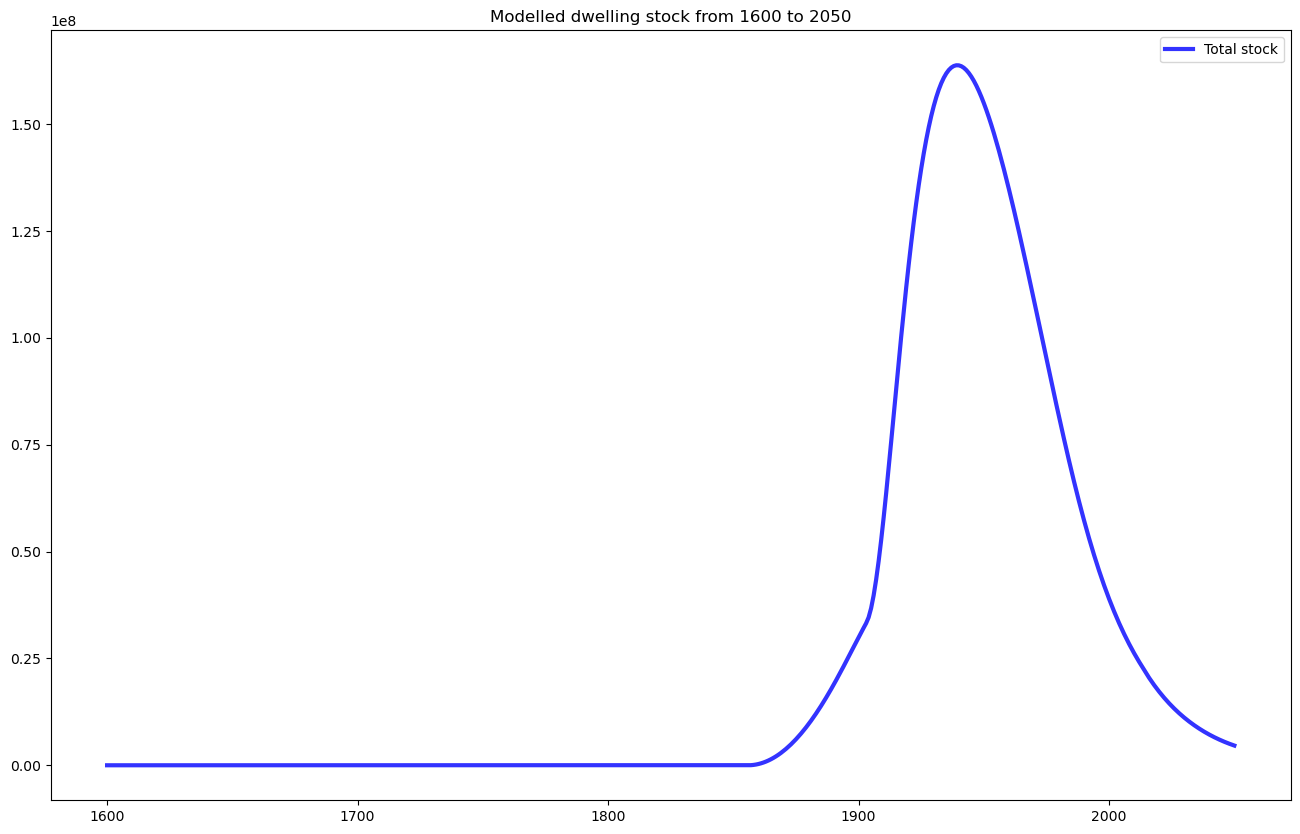

In [253]:
display(cohort_SUM)
cohort_TOT_by_year = pd.DataFrame(index=cohort_SUM.index,columns=["Total by year"])
cohort_TOT_by_year["Total by year"] = cohort_SUM.sum(axis=0)
display(cohort_TOT_by_year)
display(cohort_TOT_by_year.loc[2013])
display(DSM.loc[2013,'Stock'])

def show_SUM_construction(title,lbl,cohort_TOT_by_year=cohort_TOT_by_year):
    plt.figure(figsize=(16,10))
    plt.plot(cohort_TOT_by_year.index, cohort_TOT_by_year, color = 'blue', lw = 3, alpha = 0.8, label = lbl)
    plt.legend()
    plt.title('Modelled dwelling stock from 1600 to 2050')
    plt.savefig("Output/"+title+".png",dpi=300,bbox_inches='tight')
    plt.show()
    return

show_SUM_construction("Model-Dwe-stock-total-1600-2050",'Total stock')


# Research further 

In [257]:
display(DSM)
display(keys)
display(tau)
display(sigma)
help(lifetime)

,Population,Stock,Stock per capita,Stock change,Inflow,Outflow
1801,8671000.0,1512000.0,0.174374,NaN,NaN,NaN
1802,8731000.0,1521928.846762,0.174313,9928.846762,NaN,NaN
1803,8832000.0,1538994.696251,0.174252,17065.849489,NaN,NaN
1804,8945000.0,1558138.492061,0.174191,19143.79581,NaN,NaN
1805,9092000.0,1583188.891386,0.17413,25050.399325,NaN,NaN
...,...,...,...,...,...,...
2018,55924528.0,24213476.671103,0.432967,228170.109632,NaN,NaN
2019,56230056.0,24461242.780735,0.435021,247766.109632,NaN,NaN
2020,56325961.0,24709833.890368,0.438694,248591.109632,NaN,NaN
2021,56554891.0,24927588.0,0.440768,217754.109632,NaN,NaN


['AB', 'MFH', 'SFH', 'TH']

{'AB': 50, 'MFH': 50, 'SFH': 50, 'TH': 50}

{'AB': 20, 'MFH': 20, 'SFH': 20, 'TH': 20}

Help on function lifetime in module __main__:

lifetime(year, c, TYP, sigma={'AB': 20, 'MFH': 20, 'SFH': 20, 'TH': 20}, tau={'AB': 50, 'MFH': 50, 'SFH': 50, 'TH': 50})



In [278]:
start = 1600
end = 2050

DSM_model = pd.DataFrame(index=np.arange(start,end+1),columns=DSM.columns)
display(DSM_model)

,Population,Stock,Stock per capita,Stock change,Inflow,Outflow
1600,NaN,NaN,NaN,NaN,NaN,NaN
1601,NaN,NaN,NaN,NaN,NaN,NaN
1602,NaN,NaN,NaN,NaN,NaN,NaN
1603,NaN,NaN,NaN,NaN,NaN,NaN
1604,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
2046,NaN,NaN,NaN,NaN,NaN,NaN
2047,NaN,NaN,NaN,NaN,NaN,NaN
2048,NaN,NaN,NaN,NaN,NaN,NaN
2049,NaN,NaN,NaN,NaN,NaN,NaN


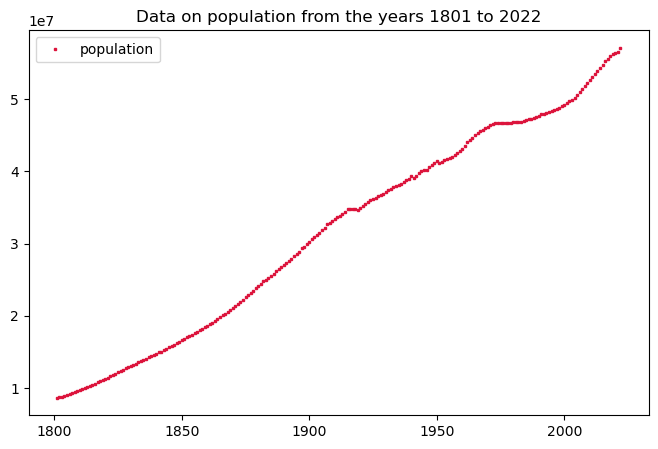

The optimal choice of parameters for the logistic function, given the sample data, is [1.9023534e+03 5.6892551e+01 1.0000000e+03 5.9801843e+07] (ti, tau, C0, C1).


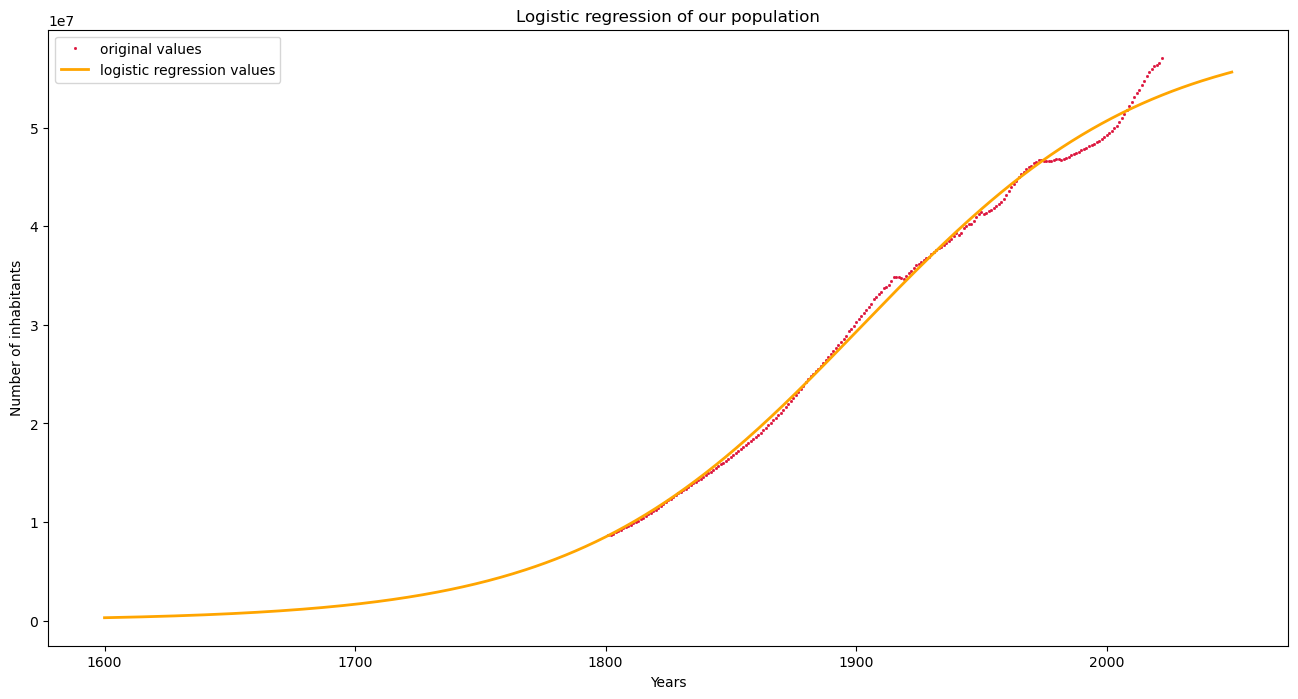

,Population,Stock,Stock per capita,Stock change,Inflow,Outflow
1600,2.937747e+05,1.014099e+06,3.451961,NaN,NaN,NaN
1601,2.989405e+05,1.014384e+06,3.393264,NaN,NaN,NaN
1602,3.041969e+05,1.014675e+06,3.335585,NaN,NaN,NaN
1603,3.095455e+05,1.014971e+06,3.278907,NaN,NaN,NaN
1604,3.149880e+05,1.015274e+06,3.223213,NaN,NaN,NaN
...,...,...,...,...,...,...
2046,5.536865e+07,2.916042e+07,0.526659,NaN,NaN,NaN
2047,5.544026e+07,2.930911e+07,0.528661,NaN,NaN,NaN
2048,5.551080e+07,2.945639e+07,0.530643,NaN,NaN,NaN
2049,5.558029e+07,2.960224e+07,0.532603,NaN,NaN,NaN


In [298]:
plt.figure(figsize=(8,5))
plt.plot(DSM.index, DSM["Population"], 's', color = 'crimson', markersize = 2, label = f'population')
plt.title('Data on population from the years 1801 to 2022')
plt.legend()
plt.show()

def logistic_pop(x:np.ndarray,ti:float,tau:float,C0:float,C1:float) -> np.ndarray:
    """
    General logistic function.
    Arguments:
    - x: np.ndarray of observation points (time)
    - ti: inflection time
    - tau: transition time coefficient
    - C0: start value
    - C1: end value

    Returns:
    - np.ndarray with len(x) number of points
    """
    return (C1 - C0)/(1 + np.exp(-(x - ti) / tau)) + C0  

inputs = DSM.index
outputs = DSM["Population"]
pred_inputs = DSM_model.index

popt, pcov = curve_fit(logistic_pop, inputs, outputs, bounds = ([min(inputs), 0, 10**3, 10**6], [max(inputs), 10**5, 10**6, 10**8]))
pred_outputs = logistic_pop(pred_inputs, *popt)
print(f'The optimal choice of parameters for the logistic function, given the sample data, is {popt} (ti, tau, C0, C1).')
fig=plt.figure(figsize = (16,8))
plt.plot(inputs, outputs, 's', color = 'crimson', markersize = 1, label = f'original values')
plt.plot(pred_inputs, pred_outputs, color = 'orange', lw = 2, label = 'logistic regression values')
plt.legend(loc = 'best')
#plt.xticks(ticks = np.rint(oj_years[:limit_pred:int(len(reg_predictor_years)/10)]))
plt.xlabel('Years')
plt.ylabel('Number of inhabitants')
plt.title('Logistic regression of our population')
plt.savefig("Output/logistic-reg-on-pop-1600-2050.png",dpi=300,bbox_inches='tight')
plt.show()

DSM_model["Population"] = pred_outputs
display(DSM_model)

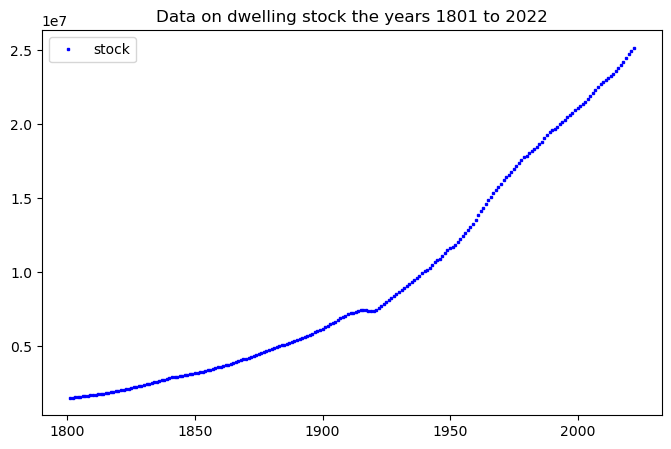

The optimal choice of parameters for the logistic function, given the sample data, is [1.99504593e+03 4.99605285e+01 1.00000000e+06 3.93160780e+07] (ti, tau, C0, C1).


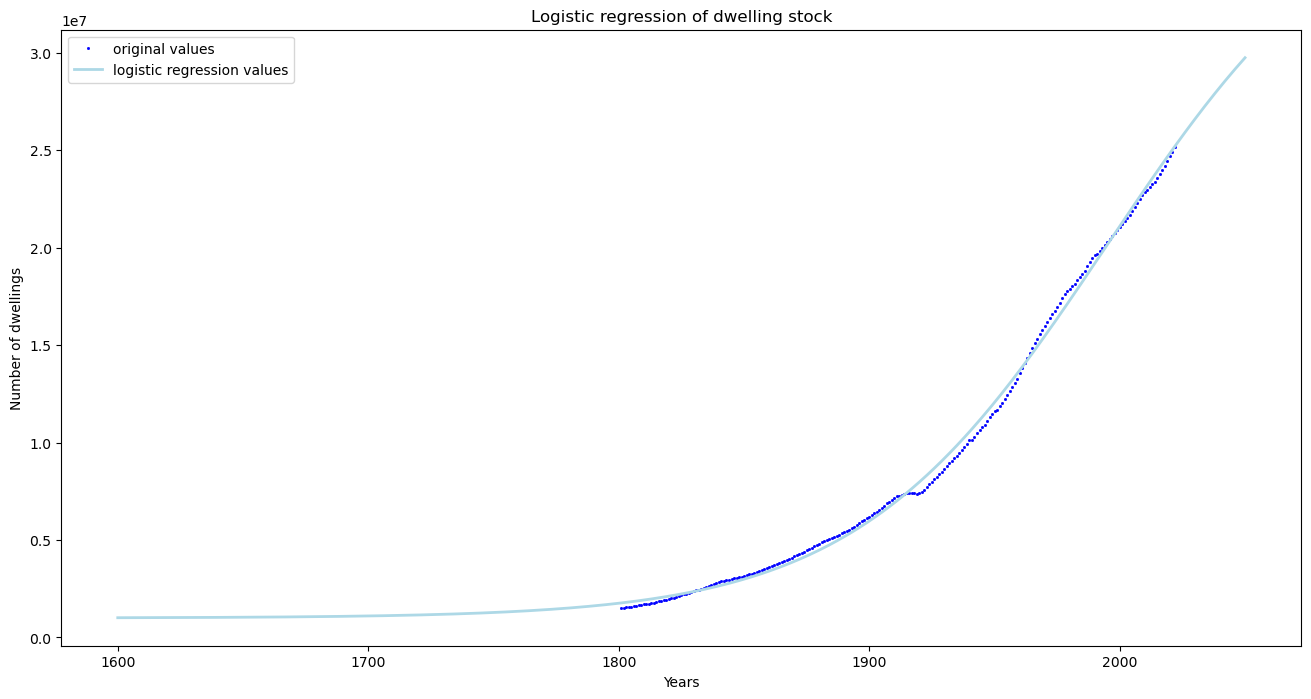

,Population,Stock,Stock per capita,Stock change,Inflow,Outflow
1600,2.937747e+05,1.014099e+06,3.451961,NaN,NaN,NaN
1601,2.989405e+05,1.014384e+06,3.393264,NaN,NaN,NaN
1602,3.041969e+05,1.014675e+06,3.335585,NaN,NaN,NaN
1603,3.095455e+05,1.014971e+06,3.278907,NaN,NaN,NaN
1604,3.149880e+05,1.015274e+06,3.223213,NaN,NaN,NaN
...,...,...,...,...,...,...
2046,5.536865e+07,2.916042e+07,0.526659,NaN,NaN,NaN
2047,5.544026e+07,2.930911e+07,0.528661,NaN,NaN,NaN
2048,5.551080e+07,2.945639e+07,0.530643,NaN,NaN,NaN
2049,5.558029e+07,2.960224e+07,0.532603,NaN,NaN,NaN


In [299]:
plt.figure(figsize=(8,5))
plt.plot(DSM.index, DSM["Stock"], 's', color = 'blue', markersize = 2, label = f'stock')
plt.title('Data on dwelling stock the years 1801 to 2022')
plt.legend()
plt.show()

def logistic_stock(x:np.ndarray,ti:float,tau:float,C0:float,C1:float) -> np.ndarray:
    """
    General logistic function.
    Arguments:
    - x: np.ndarray of observation points (time)
    - ti: inflection time
    - tau: transition time coefficient
    - C0: start value
    - C1: end value
    Returns:
    - np.ndarray with len(x) number of points
    """
    return (C1 - C0)/(1 + np.exp(-(x - ti) / tau)) + C0  

inputs = DSM.index
outputs = DSM["Stock"]
pred_inputs = DSM_model.index

popt, pcov = curve_fit(logistic_stock, inputs, outputs, bounds = ([min(inputs), 0, 10**3, 10**6], [max(inputs), 10**5, 10**6, 10**8]))
pred_outputs = logistic_stock(pred_inputs, *popt)
print(f'The optimal choice of parameters for the logistic function, given the sample data, is {popt} (ti, tau, C0, C1).')
fig=plt.figure(figsize = (16,8))
plt.plot(inputs, outputs, 's', color = 'blue', markersize = 1, label = f'original values')
plt.plot(pred_inputs, pred_outputs, color = 'lightblue', lw = 2, label = 'logistic regression values')
plt.legend(loc = 'best')
#plt.xticks(ticks = np.rint(oj_years[:limit_pred:int(len(reg_predictor_years)/10)]))
plt.xlabel('Years')
plt.ylabel('Number of dwellings')
plt.title('Logistic regression of dwelling stock')
plt.savefig("Output/logistic-reg-on-stock-1600-2050.png",dpi=300,bbox_inches='tight')
plt.show()

DSM_model["Stock"] = pred_outputs
display(DSM_model)

,Population,Stock,Stock per capita,Stock change,Inflow,Outflow
1600,2.937747e+05,1.014099e+06,3.451961,NaN,NaN,NaN
1601,2.989405e+05,1.014384e+06,3.393264,NaN,NaN,NaN
1602,3.041969e+05,1.014675e+06,3.335585,NaN,NaN,NaN
1603,3.095455e+05,1.014971e+06,3.278907,NaN,NaN,NaN
1604,3.149880e+05,1.015274e+06,3.223213,NaN,NaN,NaN
...,...,...,...,...,...,...
2046,5.536865e+07,2.916042e+07,0.526659,NaN,NaN,NaN
2047,5.544026e+07,2.930911e+07,0.528661,NaN,NaN,NaN
2048,5.551080e+07,2.945639e+07,0.530643,NaN,NaN,NaN
2049,5.558029e+07,2.960224e+07,0.532603,NaN,NaN,NaN


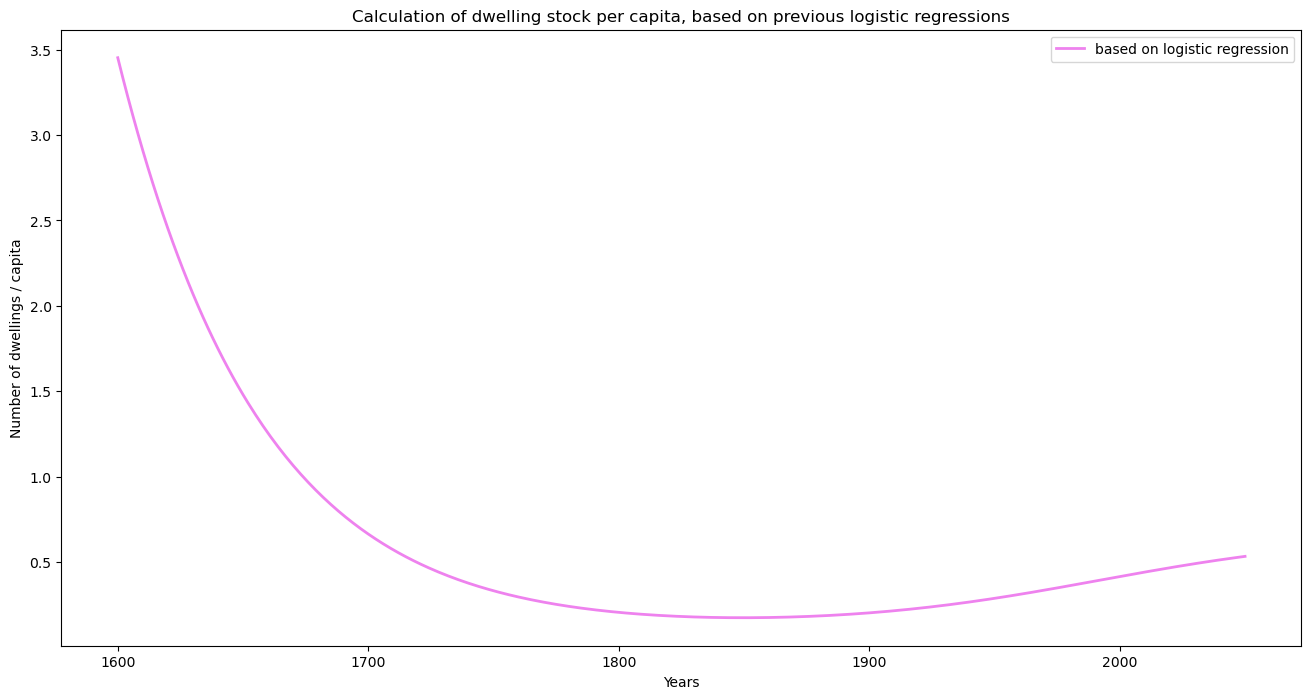

In [303]:
DSM_model['Stock per capita'] = DSM_model['Stock']/DSM_model['Population']
display(DSM_model)

pred_inputs = DSM_model.index
pred_outputs = DSM_model['Stock per capita']

fig=plt.figure(figsize = (16,8))
plt.plot(pred_inputs, pred_outputs, color = 'violet', lw = 2, label = 'based on logistic regression')
plt.legend(loc = 'best')
#plt.xticks(ticks = np.rint(oj_years[:limit_pred:int(len(reg_predictor_years)/10)]))
plt.xlabel('Years')
plt.ylabel('Number of dwellings / capita')
plt.title('Calculation of dwelling stock per capita, based on previous logistic regressions')
plt.savefig("Output/logistic-reg-stock-per-cap-1600-2050.png",dpi=300,bbox_inches='tight')
plt.show()

In [304]:
for i in DSM_model.index[1:]:
    DSM_model.loc[i,"Stock change"] = DSM_model.loc[i,"Stock"] - DSM_model.loc[i-1,"Stock"]
display(DSM_model)

,Population,Stock,Stock per capita,Stock change,Inflow,Outflow
1600,2.937747e+05,1.014099e+06,3.451961,NaN,NaN,NaN
1601,2.989405e+05,1.014384e+06,3.393264,284.936764,NaN,NaN
1602,3.041969e+05,1.014675e+06,3.335585,290.693093,NaN,NaN
1603,3.095455e+05,1.014971e+06,3.278907,296.565622,NaN,NaN
1604,3.149880e+05,1.015274e+06,3.223213,302.556693,NaN,NaN
...,...,...,...,...,...,...
2046,5.536865e+07,2.916042e+07,0.526659,150096.897833,NaN,NaN
2047,5.544026e+07,2.930911e+07,0.528661,148691.82428,NaN,NaN
2048,5.551080e+07,2.945639e+07,0.530643,147277.022879,NaN,NaN
2049,5.558029e+07,2.960224e+07,0.532603,145853.239211,NaN,NaN


In [309]:
Nones = [None for i in DSM_model.index]
for t in keys:
    DSM_model['Stock '+t] = Nones
display(DSM_model)

,Population,Stock,Stock per capita,Stock change,Inflow,Outflow,Stock AB,Stock MFH,Stock SFH,Stock TH
1600,2.937747e+05,1.014099e+06,3.451961,NaN,NaN,NaN,None,None,None,None
1601,2.989405e+05,1.014384e+06,3.393264,284.936764,NaN,NaN,None,None,None,None
1602,3.041969e+05,1.014675e+06,3.335585,290.693093,NaN,NaN,None,None,None,None
1603,3.095455e+05,1.014971e+06,3.278907,296.565622,NaN,NaN,None,None,None,None
1604,3.149880e+05,1.015274e+06,3.223213,302.556693,NaN,NaN,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...
2046,5.536865e+07,2.916042e+07,0.526659,150096.897833,NaN,NaN,None,None,None,None
2047,5.544026e+07,2.930911e+07,0.528661,148691.82428,NaN,NaN,None,None,None,None
2048,5.551080e+07,2.945639e+07,0.530643,147277.022879,NaN,NaN,None,None,None,None
2049,5.558029e+07,2.960224e+07,0.532603,145853.239211,NaN,NaN,None,None,None,None


1.7311695493898998

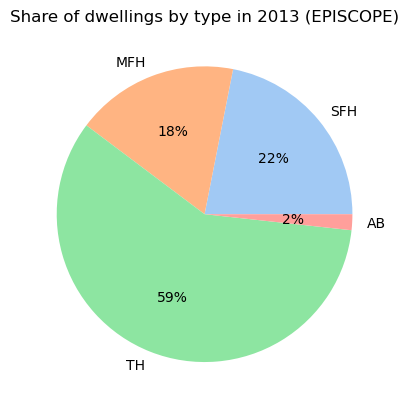

In [313]:
# Let's see how the 2013 data is shared: 
# display(cohort_2013_by_TYP)

colors = sns.color_palette('pastel')[0:5]
plt.pie(cohort_2013_by_TYP, labels = cohort_2013_by_TYP.index, colors = colors, autopct='%.0f%%')
plt.title('Share of dwellings by type in 2013 (EPISCOPE)')
plt.savefig('Output/Share-by-type-2013.png',dpi=300,bbox_inches='tight')
plt.show()

Let's distribute the share of those within the years. 

,Population,Stock,Stock per capita,Stock change,Inflow,Outflow,Stock AB,Stock MFH,Stock SFH,Stock TH
1600,2.937747e+05,1.014099e+06,3.451961,NaN,NaN,NaN,17555.771200,1.808558e+05,2.221593e+05,5.935280e+05
1601,2.989405e+05,1.014384e+06,3.393264,284.936764,NaN,NaN,17560.703939,1.809066e+05,2.222217e+05,5.936948e+05
1602,3.041969e+05,1.014675e+06,3.335585,290.693093,NaN,NaN,17565.736329,1.809585e+05,2.222854e+05,5.938649e+05
1603,3.095455e+05,1.014971e+06,3.278907,296.565622,NaN,NaN,17570.870383,1.810113e+05,2.223504e+05,5.940385e+05
1604,3.149880e+05,1.015274e+06,3.223213,302.556693,NaN,NaN,17576.108152,1.810653e+05,2.224166e+05,5.942156e+05
...,...,...,...,...,...,...,...,...,...,...
2046,5.536865e+07,2.916042e+07,0.526659,150096.897833,NaN,NaN,504816.326597,5.200510e+06,6.388192e+06,1.706690e+07
2047,5.544026e+07,2.930911e+07,0.528661,148691.82428,NaN,NaN,507390.434182,5.227028e+06,6.420766e+06,1.715393e+07
2048,5.551080e+07,2.945639e+07,0.530643,147277.022879,NaN,NaN,509940.049155,5.253293e+06,6.453030e+06,1.724013e+07
2049,5.558029e+07,2.960224e+07,0.532603,145853.239211,NaN,NaN,512465.016019,5.279305e+06,6.484982e+06,1.732549e+07


['AB', 'MFH', 'SFH', 'TH']

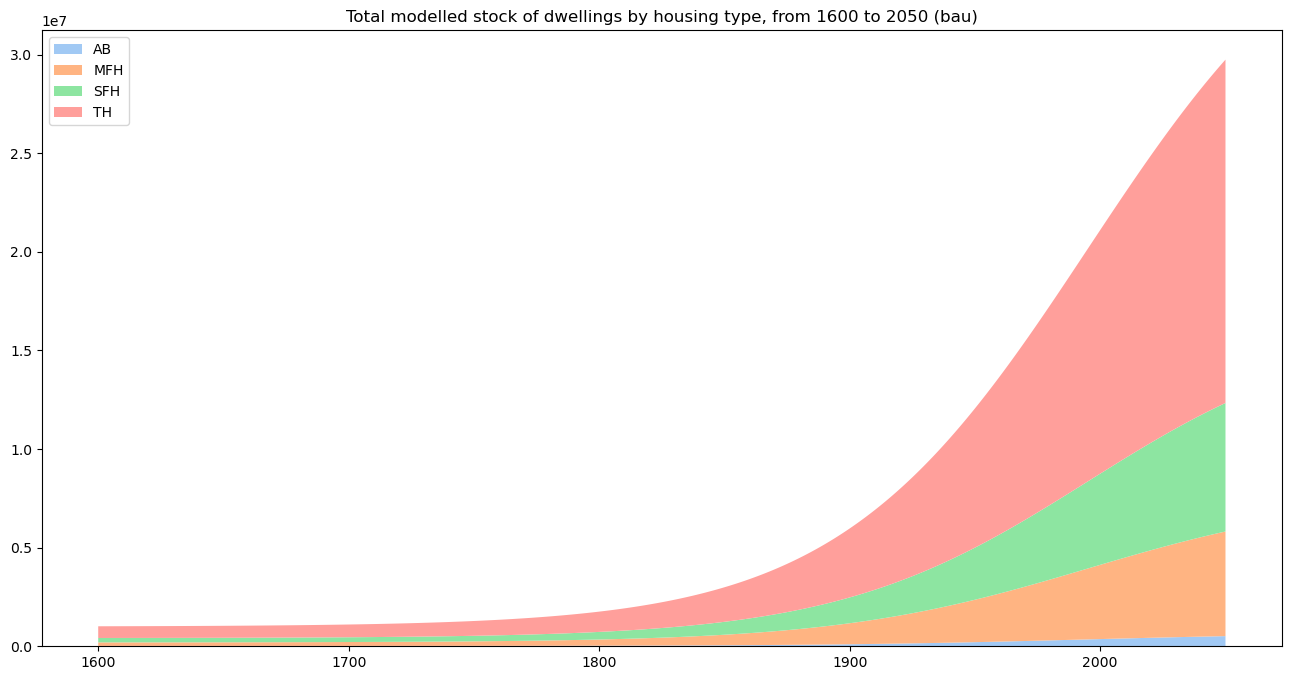

In [433]:
# First option: those shares stay the same across the time. 

for t in keys:
    DSM_model['Stock '+t] = [cohort_2013_by_TYP[t]/100 for i in DSM_model.index]
    DSM_model['Stock '+t] = DSM_model['Stock '+t]*DSM_model['Stock']

display(DSM_model)
display(keys)

DSM_model_by_TYP = [DSM_model['Stock AB'].to_list(),DSM_model['Stock MFH'].to_list(),DSM_model['Stock SFH'].to_list(),DSM_model['Stock TH'].to_list()]

colors = sns.color_palette('pastel')[0:5]

plt.figure(figsize=(16,8))
plt.stackplot(DSM_model.index,DSM_model_by_TYP, labels=keys, colors=colors)
plt.legend(loc='upper left')
plt.title('Total modelled stock of dwellings by housing type, from 1600 to 2050 (bau)')
plt.savefig("Output/logistic-reg-stock-by-type-1600-2050.png",dpi=300,bbox_inches='tight')
plt.show()

,pre 1919,1919-1944,1945-1964,1965-1980,1981-1990,1991- 2003,2004-2013
SFH,6.392029e+05,5.893139e+05,7.753584e+05,1.253461e+06,797184.804758,815893.183488,222421.836008
MFH,1.020646e+06,3.263573e+05,6.184159e+05,9.894654e+05,477063.657606,406387.560183,307648.894666
TH,3.387256e+06,2.921625e+06,3.145086e+06,2.381161e+06,722351.289840,744177.731691,304530.831544
AB,1.420151e+04,2.212692e+04,8.522706e+04,1.953986e+05,12775.165365,21795.339485,50928.364320


pre 1919      5.061306e+06
1919-1944     3.859423e+06
1945-1964     4.624088e+06
1965-1980     4.819486e+06
1981-1990     2.009375e+06
1991- 2003    1.988254e+06
2004-2013     8.855299e+05
dtype: float64

,pre 1919,1919-1944,1945-1964,1965-1980,1981-1990,1991- 2003,2004-2013
SFH,0.126292,0.152695,0.167678,0.260082,0.396733,0.410357,0.251174
MFH,0.201657,0.084561,0.133738,0.205305,0.237419,0.204394,0.347418
TH,0.669245,0.757011,0.680153,0.494069,0.359491,0.374287,0.343897
AB,0.002806,0.005733,0.018431,0.040543,0.006358,0.010962,0.057512


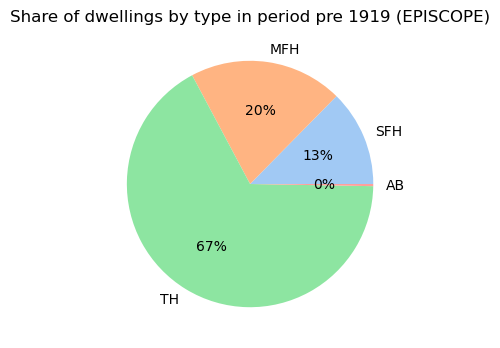

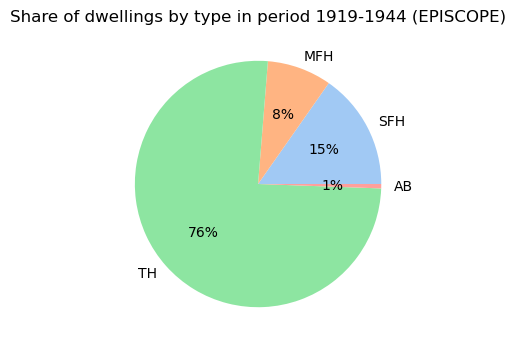

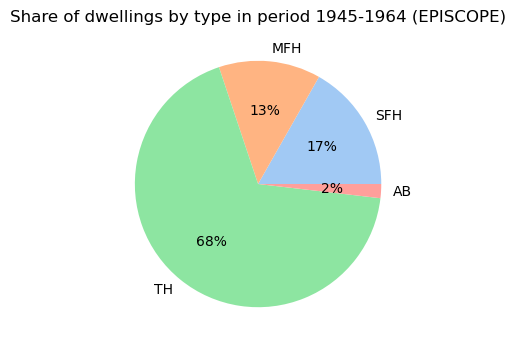

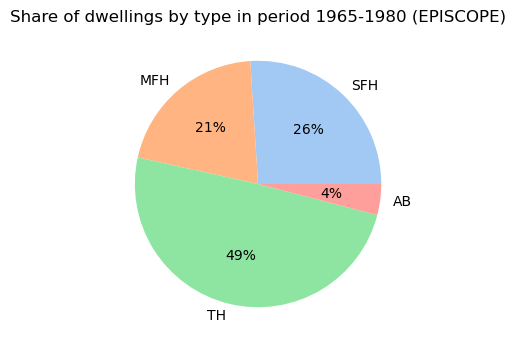

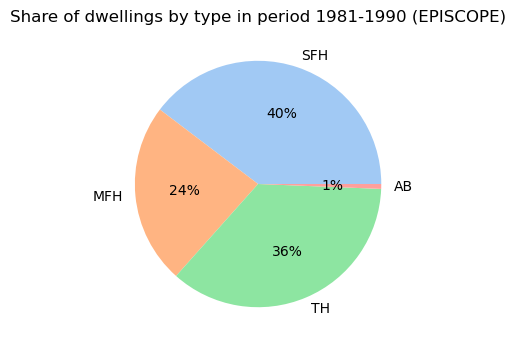

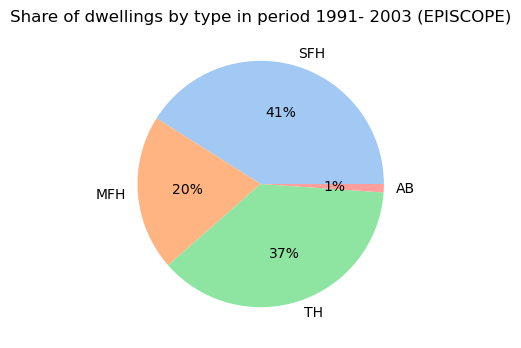

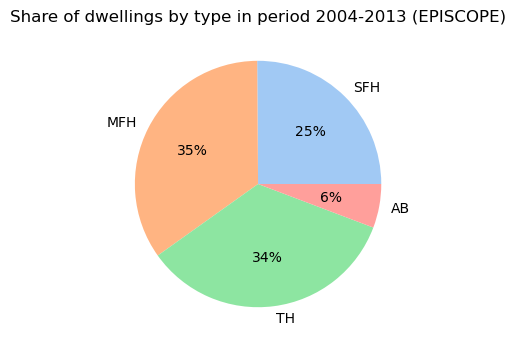

,SFH,MFH,TH,AB
1900,0.126292,0.201657,0.669245,0.002806
1931,0.152695,0.084561,0.757011,0.005733
1954,0.167678,0.133738,0.680153,0.018431
1972,0.260082,0.205305,0.494069,0.040543
1985,0.396733,0.237419,0.359491,0.006358
1997,0.410357,0.204394,0.374287,0.010962
2008,0.251174,0.347418,0.343897,0.057512


In [374]:
display(EPISCOPE_TYP_freq)
display(EPISCOPE_TYP_freq.sum(axis=0))

# Let's assume that all have a similar lifespan => the difference in share across time can be reinjected in our above model.

EPISCOPE_TYP_freq_share = EPISCOPE_TYP_freq.copy(deep=True)
for i in EPISCOPE_TYP_freq_share.index:
    for j in EPISCOPE_TYP_freq_share.columns:
        EPISCOPE_TYP_freq_share.loc[i,j] = EPISCOPE_TYP_freq.loc[i,j]/EPISCOPE_TYP_freq.sum(axis=0)[j]

display(EPISCOPE_TYP_freq_share)

colors = sns.color_palette('pastel')[0:5]
for periods in EPISCOPE_TYP_freq_share.columns:
    plt.figure(figsize=(4,4))
    plt.pie(EPISCOPE_TYP_freq_share[periods], labels = EPISCOPE_TYP_freq_share.index, colors = colors, autopct='%.0f%%')
    plt.title('Share of dwellings by type in period ' + periods + ' (EPISCOPE)')
    plt.savefig('Output/Share-by-type-'+periods+'.png',dpi=300,bbox_inches='tight')
    plt.show()

a = int((1919+1944)/2)
b = int((1945+1964)/2)
c = int((1965+1980)/2)
d = int((1981+1990)/2)
e = int((1991+2003)/2)
f = int((2004+2013)/2)
EPISCOPE_TYP_freq_share.columns=[1900,a,b,c,d,e,f]
EPISCOPE_TYP_freq_share = EPISCOPE_TYP_freq_share.T
display(EPISCOPE_TYP_freq_share)

,SFH,MFH,TH,AB
1900,0.126292,0.201657,0.669245,0.002806
1931,0.152695,0.084561,0.757011,0.005733
1954,0.167678,0.133738,0.680153,0.018431
1972,0.260082,0.205305,0.494069,0.040543
1985,0.396733,0.237419,0.359491,0.006358
1997,0.410357,0.204394,0.374287,0.010962
2008,0.251174,0.347418,0.343897,0.057512
1600,0.200000,0.400000,0.400000,0.000000


 the polynomial our fit created is: 
           2
6.303e-06 x - 0.02234 x + 19.81.


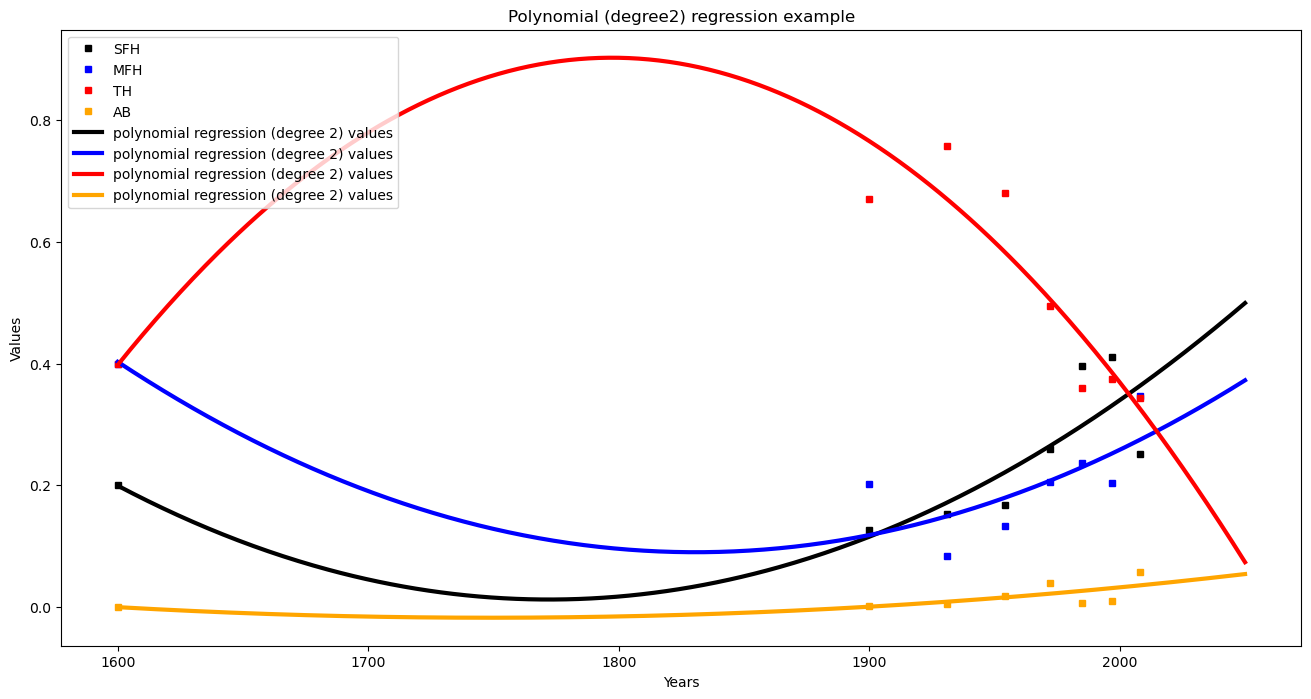

,SFH,MFH,TH,AB
1600,0.19947,0.402697,0.397709,0.000124
1601,0.197306,0.399994,0.402809,-0.000109
1602,0.195155,0.397304,0.407882,-0.000341
1603,0.193016,0.394625,0.41293,-0.000571
1604,0.19089,0.391958,0.417951,-0.000799
...,...,...,...,...
2046,0.485328,0.362246,0.099903,0.052522
2047,0.488787,0.364779,0.093443,0.052991
2048,0.492258,0.367323,0.086956,0.053463
2049,0.495742,0.369879,0.080443,0.053935


,SFH,MFH,TH,AB
1600,0.19947,0.402697,0.397709,0.000124
1601,0.197285,0.399951,0.402765,0.0
1602,0.195088,0.397169,0.407743,0.0
1603,0.192906,0.3944,0.412694,0.0
1604,0.190737,0.391645,0.417618,0.0
...,...,...,...,...
2046,0.485328,0.362246,0.099903,0.052522
2047,0.488787,0.364779,0.093443,0.052991
2048,0.492258,0.367323,0.086956,0.053463
2049,0.495742,0.369879,0.080443,0.053935


1600    1.0
1601    1.0
1602    1.0
1603    1.0
1604    1.0
       ... 
2046    1.0
2047    1.0
2048    1.0
2049    1.0
2050    1.0
Length: 451, dtype: float64

In [427]:
EPISCOPE_TYP_freq_share.loc[1600] = [0.2,0.4,0.4,0.0]
display(EPISCOPE_TYP_freq_share)

inputs = EPISCOPE_TYP_freq_share.index
outputs_SFH = EPISCOPE_TYP_freq_share['SFH']
outputs_MFH = EPISCOPE_TYP_freq_share['MFH']
outputs_TH = EPISCOPE_TYP_freq_share['TH']
outputs_AB = EPISCOPE_TYP_freq_share['AB']
pred_inputs = DSM_model.index

degree = 2

polynomial_S = np.poly1d(np.polyfit(inputs, outputs_SFH, degree))
polynomial_M = np.poly1d(np.polyfit(inputs, outputs_MFH, degree))
polynomial_T = np.poly1d(np.polyfit(inputs, outputs_TH, degree))
polynomial_A = np.poly1d(np.polyfit(inputs, outputs_AB, degree))
print(f' the polynomial our fit created is: \n{polynomial}.')
#apply to extended values
pred_outputs_S = polynomial_S(pred_inputs)
pred_outputs_M = polynomial_M(pred_inputs)
pred_outputs_T = polynomial_T(pred_inputs)
pred_outputs_A = polynomial_A(pred_inputs)
fig=plt.figure(figsize = (16,8))
plt.plot(inputs, outputs_SFH, 's', color = 'black', markersize = 5, label = f'SFH')
plt.plot(inputs, outputs_MFH, 's', color = 'blue', markersize = 5, label = f'MFH')
plt.plot(inputs, outputs_TH, 's', color = 'red', markersize = 5, label = f'TH')
plt.plot(inputs, outputs_AB, 's', color = 'orange', markersize = 5, label = f'AB')
plt.plot(pred_inputs, pred_outputs_S, color = 'black', lw = 3,label = f'polynomial regression (degree {degree}) values')
plt.plot(pred_inputs, pred_outputs_M, color = 'blue', lw = 3, label = f'polynomial regression (degree {degree}) values')
plt.plot(pred_inputs, pred_outputs_T, color = 'red', lw = 3, label = f'polynomial regression (degree {degree}) values')
plt.plot(pred_inputs, pred_outputs_A, color = 'orange', lw = 3, label = f'polynomial regression (degree {degree}) values')
plt.legend(loc = 'upper left')
plt.title(f'Polynomial (degree{degree}) regression example')
plt.xlabel('Years')
plt.ylabel('Values')
plt.show()

EPISCOPE_TYP_share_model = pd.DataFrame(index=DSM_model.index,columns=EPISCOPE_TYP_freq_share.columns)
start = EPISCOPE_TYP_share_model.index[0]
for i in EPISCOPE_TYP_share_model.index:
    EPISCOPE_TYP_share_model.loc[i] = [pred_outputs_S[i-start],pred_outputs_M[i-start],pred_outputs_T[i-start],pred_outputs_A[i-start]]
display(EPISCOPE_TYP_share_model)

# Let's 1/ Put all numbers into the (0,1) boundaries and 2/ make sure the total is equal to 1 
for i in EPISCOPE_TYP_share_model.index:
    for j in EPISCOPE_TYP_share_model.columns:
        if EPISCOPE_TYP_share_model.loc[i,j] < 0:
            EPISCOPE_TYP_share_model.loc[i,j] = 0
        if EPISCOPE_TYP_share_model.loc[i,j] > 1:
            EPISCOPE_TYP_share_model.loc[i,j] = 1

for i in EPISCOPE_TYP_share_model.index:
    EPISCOPE_TYP_share_model.loc[i] = EPISCOPE_TYP_share_model.loc[i]/EPISCOPE_TYP_share_model.sum(axis=1)[i]
    
"""
for i in EPISCOPE_TYP_share_model.index:
    for j in EPISCOPE_TYP_share_model.columns:
        print(EPISCOPE_TYP_share_model.loc[i,j])
        EPISCOPE_TYP_share_model.loc[i,j] = EPISCOPE_TYP_share_model.loc[i,j]/EPISCOPE_TYP_share_model.sum(axis=1)[i]
        print(EPISCOPE_TYP_share_model.loc[i,j])
"""

display(EPISCOPE_TYP_share_model)
display(EPISCOPE_TYP_share_model.sum(axis=1))

,SFH,MFH,TH,AB
1600,0.19947,0.402697,0.397709,0.000124
1601,0.197285,0.399951,0.402765,0.0
1602,0.195088,0.397169,0.407743,0.0
1603,0.192906,0.3944,0.412694,0.0
1604,0.190737,0.391645,0.417618,0.0
...,...,...,...,...
2046,0.485328,0.362246,0.099903,0.052522
2047,0.488787,0.364779,0.093443,0.052991
2048,0.492258,0.367323,0.086956,0.053463
2049,0.495742,0.369879,0.080443,0.053935


,Population,Stock,Stock per capita,Stock change,Inflow,Outflow,Stock AB,Stock MFH,Stock SFH,Stock TH
1600,2.937747e+05,1.014099e+06,3.451961,NaN,NaN,NaN,1.255182e+02,4.083741e+05,2.022826e+05,4.033166e+05
1601,2.989405e+05,1.014384e+06,3.393264,284.936764,NaN,NaN,0.000000e+00,4.057034e+05,2.001224e+05,4.085580e+05
1602,3.041969e+05,1.014675e+06,3.335585,290.693093,NaN,NaN,0.000000e+00,4.029968e+05,1.979511e+05,4.137266e+05
1603,3.095455e+05,1.014971e+06,3.278907,296.565622,NaN,NaN,0.000000e+00,4.003046e+05,1.957938e+05,4.188726e+05
1604,3.149880e+05,1.015274e+06,3.223213,302.556693,NaN,NaN,0.000000e+00,3.976270e+05,1.936505e+05,4.239961e+05
...,...,...,...,...,...,...,...,...,...,...
2046,5.536865e+07,2.916042e+07,0.526659,150096.897833,NaN,NaN,1.531559e+06,1.056326e+07,1.415238e+07,2.913227e+06
2047,5.544026e+07,2.930911e+07,0.528661,148691.82428,NaN,NaN,1.553133e+06,1.069135e+07,1.432591e+07,2.738723e+06
2048,5.551080e+07,2.945639e+07,0.530643,147277.022879,NaN,NaN,1.574817e+06,1.082002e+07,1.450014e+07,2.561412e+06
2049,5.558029e+07,2.960224e+07,0.532603,145853.239211,NaN,NaN,1.596610e+06,1.094926e+07,1.467507e+07,2.381307e+06


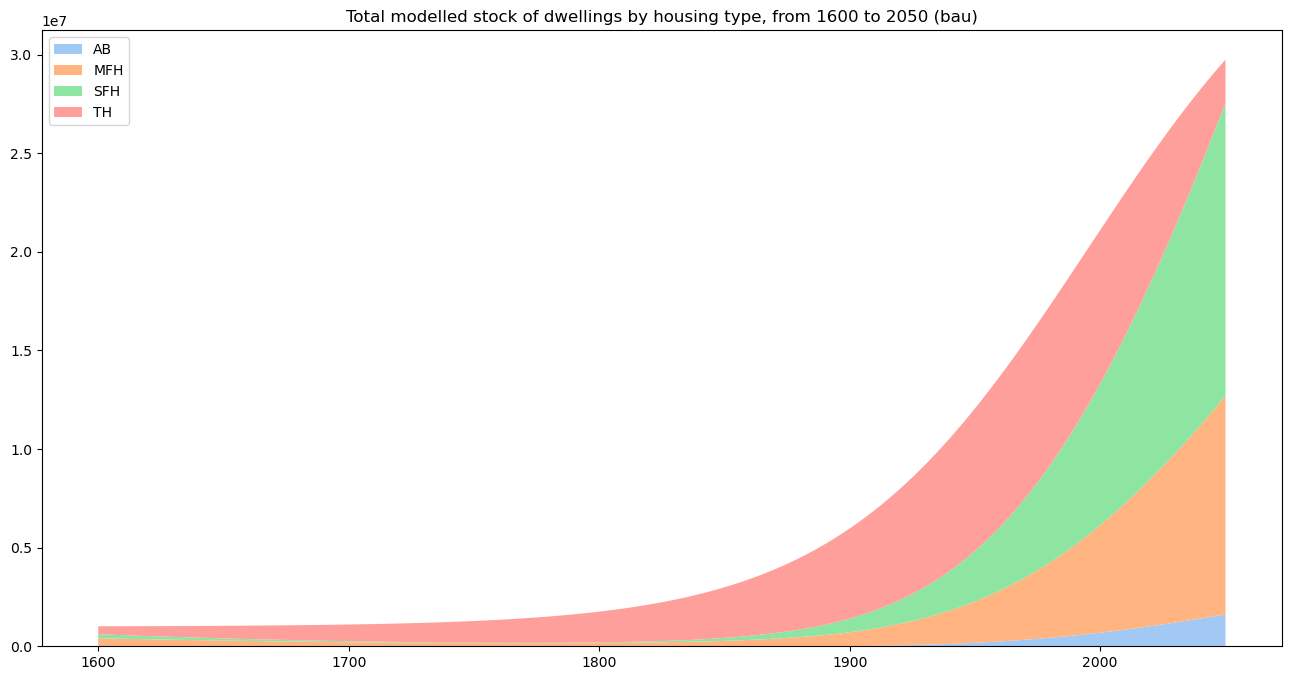

In [434]:
# Let's take into account the changes in TYP shares 

display(EPISCOPE_TYP_share_model)

for i in DSM_model.index:
    for t in keys:
        DSM_model.loc[i,'Stock '+t] = EPISCOPE_TYP_share_model.loc[i,t]*DSM_model.loc[i,'Stock']

display(DSM_model)

DSM_model_by_TYP = [DSM_model['Stock AB'].to_list(),DSM_model['Stock MFH'].to_list(),DSM_model['Stock SFH'].to_list(),DSM_model['Stock TH'].to_list()]

colors = sns.color_palette('pastel')[0:5]

plt.figure(figsize=(16,8))
plt.stackplot(DSM_model.index,DSM_model_by_TYP, labels=keys, colors=colors)
plt.legend(loc='upper left')
plt.title('Total modelled stock of dwellings by housing type, from 1600 to 2050 (bau)')
plt.savefig("Output/logistic-reg-stock-by-type-shares-1600-2050.png",dpi=300,bbox_inches='tight')
plt.show()

Stock-driven model 

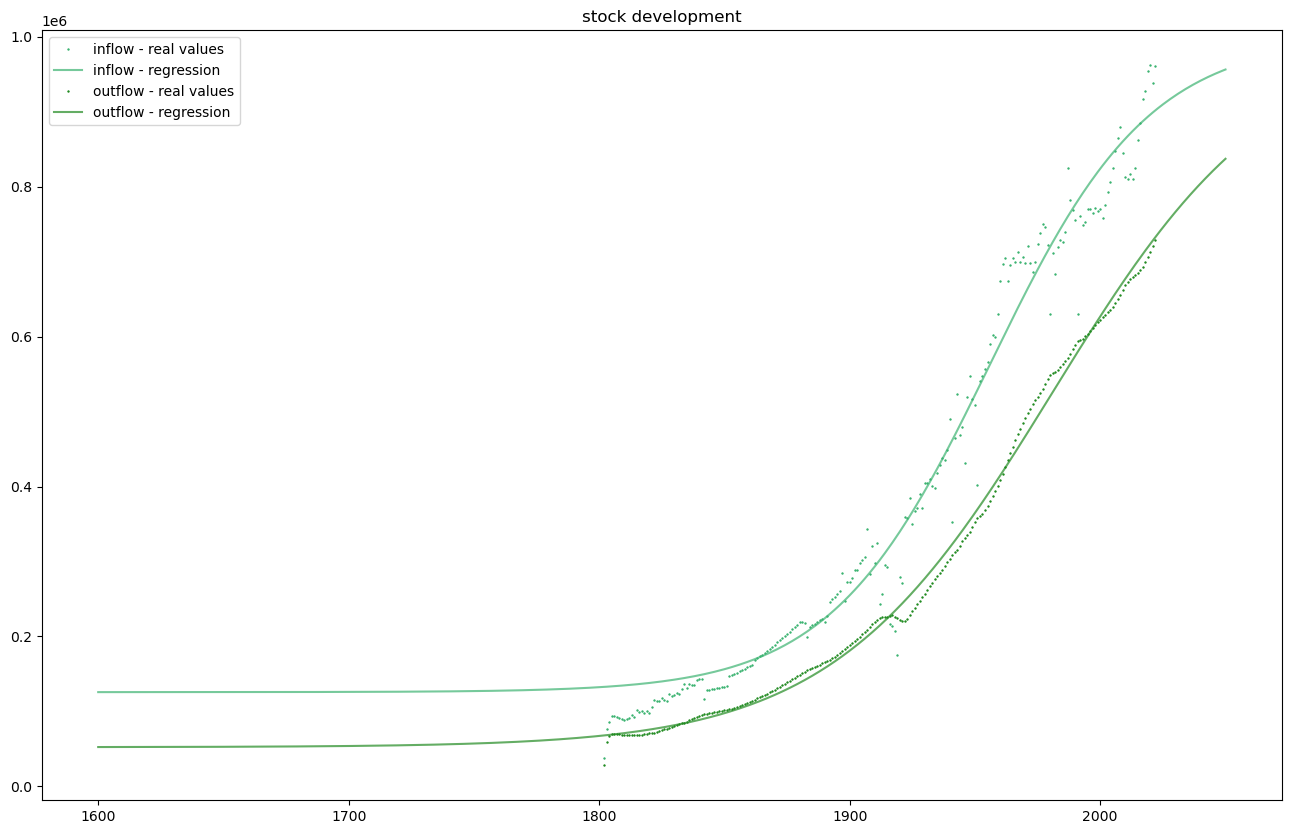

In [352]:
lifetime = {
    'Type': 'LogNormal',
    'Mean': np.array([45]),
    'StdDev': np.array([19.0])
}

flow = dsm.DynamicStockModel(t=DSM.index,name="total dwelling stock",s=np.array(DSM['Stock']),lt=lifetime)

S_C, O_C, I = flow.compute_stock_driven_model()
O = flow.compute_outflow_total()
DS = flow.compute_stock_change()

#display(I)
#display(O)

popt, pcov = curve_fit(logistic_stock, DSM.index, O, bounds = ([min(inputs), 0, 10**3, 10**6], [max(inputs), 10**5, 10**6, 10**8]))
O_model = logistic_stock(DSM_model.index, *popt)

popt, pcov = curve_fit(logistic_stock, DSM.index, I, bounds = ([min(inputs), 0, 10**3, 10**6], [max(inputs), 10**5, 10**6, 10**8]))
I_model = logistic_stock(DSM_model.index, *popt)

plt.figure(figsize=(16,10))
#plt.plot(year, stock, 'x', color = 'red', markersize = 4, label = f'stock')
plt.plot(DSM.index[1:], I[1:], '+', color = 'mediumseagreen', markersize = 2, label = f'inflow - real values')
plt.plot(DSM_model.index, I_model, color = 'mediumseagreen', markersize = 1, label = f'inflow - regression', alpha=0.7)
plt.plot(DSM.index[1:], O[1:], '+', color = 'forestgreen', markersize = 2, label = f'outflow - real values')
plt.plot(DSM_model.index, O_model, color = 'forestgreen', markersize = 1, label = f'outflow - regression', alpha=0.7)
plt.title('stock development')
plt.legend()
plt.show()